# Data Preparation

## Import Packages

In [345]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('dark_background')
from linearmodels import PooledOLS
import statsmodels.api as sm
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import scikitplot as skplt

import xgboost as xgb
xgb.__version__
import shap

## Data Information

In [2]:
income_info = {"filename" : "data/for_dashboard/df_income_test_3.csv",
                "separator" : ","}

In [3]:
group_income_info = {"filename" : "data/for_dashboard/df_income_agg.csv",
                      "separator" : ","}

In [4]:
cap_info = {"filename" : "data/for_dashboard/df_cap_test_7.csv",
                "separator" : ","}

In [5]:
group_cap_info = {"filename" : "data/for_dashboard/df_cap_agg_7.csv",
                      "separator" : ","}

## Functions

### Missing Value

In [6]:
def missing_value(df):
    """
    Function to calculate percentage of missing values per column for a given dataframe
    
    input:
        df : given dataframe
        
    output:
        a table of columns of percentage of missing value in a dataframe per column
    """
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

## Load Data

### Income

#### Individual Level Data

In [7]:
df_inc_raw = pd.read_csv(income_info['filename'],
                         income_info['separator'])
df_inc_raw

,Unnamed: 0,URUT,age,marital_status,nett_income,industry,employ_status,EXP_CAP_x,WEIND_x,bps_2009,yrs_school,gender,urban,moved,is_working,commute_vehicle,sector,work_day,work_hour,ft_status,log_exp_cap,log_nett_income,primary,secondary,tertiary,sector_all,household_count,FOOD,NFOOD,EXPEND,KAPITA,KALORI,WERT,Label,Label_edit,label_final,region_type,provinsi,pulau
0,0,110112500101603,60,2,3900000.0,18.0,4.0,1.305774e+06,20.006414,1101,16,1.0,1.0,0.0,1.0,2.0,3,5.0,40.0,1.0,14.082306,15.176487,0.0,0.0,1.0,1.0,4,2.901429e+06,2.321667e+06,5.223095e+06,1.305774e+06,2593.590357,20.006414,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera
1,1,110112500101603,46,2,2900000.0,18.0,4.0,1.305774e+06,20.006414,1101,16,0.0,1.0,0.0,1.0,2.0,3,6.0,42.0,1.0,14.082306,14.880221,0.0,0.0,1.0,1.0,4,2.901429e+06,2.321667e+06,5.223095e+06,1.305774e+06,2593.590357,20.006414,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera
2,2,110112500101604,42,2,3000000.0,18.0,4.0,4.017619e+05,42.398369,1101,12,1.0,1.0,0.0,1.0,2.0,3,7.0,40.0,1.0,12.903615,14.914123,0.0,0.0,1.0,1.0,6,1.394571e+06,1.016000e+06,2.410571e+06,4.017619e+05,1430.819048,42.398369,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera
3,3,110112500101605,34,2,1800000.0,18.0,4.0,7.000714e+05,43.420265,1101,16,1.0,1.0,0.0,1.0,2.0,3,5.0,40.0,1.0,13.458938,14.403297,0.0,0.0,1.0,1.0,4,1.588286e+06,1.212000e+06,2.800286e+06,7.000714e+05,1482.632143,43.420265,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera
4,4,110112500101605,31,2,1200000.0,18.0,4.0,7.000714e+05,43.420265,1101,12,0.0,1.0,0.0,1.0,2.0,3,5.0,40.0,1.0,13.458938,13.997832,0.0,0.0,1.0,1.0,4,1.588286e+06,1.212000e+06,2.800286e+06,7.000714e+05,1482.632143,43.420265,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,163544,947122001103806,23,1,1000000.0,18.0,4.0,1.648210e+06,438.129364,9471,12,0.0,0.0,0.0,1.0,0.0,3,5.0,40.0,1.0,14.315200,13.815511,0.0,0.0,1.0,1.0,5,3.085714e+06,5.155333e+06,8.241048e+06,1.648210e+06,1381.880000,438.129364,71. Jayapura,jayapura,jayapura,kabupaten,papua,papua
163545,163545,947122001103807,46,2,4800000.0,18.0,4.0,1.959000e+06,321.015991,9471,18,1.0,0.0,1.0,1.0,0.0,3,5.0,40.0,1.0,14.487945,15.384126,0.0,0.0,1.0,1.0,5,4.860000e+06,4.935000e+06,9.795000e+06,1.959000e+06,1970.742286,321.015991,71. Jayapura,jayapura,jayapura,kabupaten,papua,papua
163546,163546,947122001103807,42,2,2500000.0,18.0,4.0,1.959000e+06,321.015991,9471,16,0.0,0.0,1.0,1.0,0.0,3,5.0,40.0,1.0,14.487945,14.731801,0.0,0.0,1.0,1.0,5,4.860000e+06,4.935000e+06,9.795000e+06,1.959000e+06,1970.742286,321.015991,71. Jayapura,jayapura,jayapura,kabupaten,papua,papua
163547,163547,947122001103810,37,2,2000000.0,18.0,4.0,1.348310e+06,6.000000,9471,16,1.0,0.0,0.0,1.0,0.0,3,6.0,36.0,0.0,14.114362,14.508658,0.0,0.0,1.0,1.0,6,3.462857e+06,4.627000e+06,8.089857e+06,1.348310e+06,1573.511905,6.000000,71. Jayapura,jayapura,jayapura,kabupaten,papua,papua


#### District Level Data

In [8]:
df_inc_grp_raw = pd.read_csv(group_income_info['filename'],
                             group_income_info['separator'])
df_inc_grp_raw

,Unnamed: 0,bps_2009,EXP_CAP,urban,gender,yrs_school,work_hour,work_day,nett_income,WEIND,log_exp_cap,log_nett_income,age,pct_primary,pct_secondary,pct_tertiary,Label,Label_edit,label_final,region_type,provinsi,pulau
0,0,1101,8.220678e+05,0.410344,0.667843,12.515057,38.761385,5.644093,1.632255e+06,8.034224e+03,13.619578,14.305473,35.256287,0.030488,0.103659,0.859756,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera
1,1,1102,5.983849e+05,0.263985,0.682823,8.975460,37.080634,5.455771,1.418100e+06,1.606223e+04,13.301990,14.164828,33.461182,0.460076,0.060837,0.463878,02. Aceh Singkil,aceh singkil,aceh singkil,kabupaten,aceh,sumatera
2,2,1103,6.380280e+05,0.218588,0.710317,10.787252,39.384679,5.507923,1.473815e+06,2.381257e+04,13.366137,14.203365,35.062013,0.167401,0.154185,0.678414,03. Aceh Selatan,aceh selatan,aceh selatan,kabupaten,aceh,sumatera
3,3,1104,5.508644e+05,0.220122,0.666496,12.226784,32.185180,5.492067,1.677144e+06,1.131117e+04,13.219244,14.332603,35.997709,0.080645,0.056452,0.854839,04. Aceh Tenggara,aceh tenggara,aceh tenggara,kabupaten,aceh,sumatera
4,4,1105,5.958435e+05,0.159667,0.736147,8.722487,37.581485,5.734923,1.228134e+06,5.286232e+04,13.297733,14.021007,34.975881,0.492492,0.135135,0.348348,05. Aceh Timur,aceh timur,aceh timur,kabupaten,aceh,sumatera
5,5,1106,9.598609e+05,0.425313,0.634019,12.322195,35.442354,5.454367,1.937413e+06,1.912806e+04,13.774544,14.476864,35.936089,0.071429,0.142857,0.780612,06. Aceh Tengah,aceh tengah,aceh tengah,kabupaten,aceh,sumatera
6,6,1107,7.845973e+05,0.369947,0.717302,10.544628,39.720360,5.721531,1.632896e+06,3.099251e+04,13.572926,14.305866,34.507576,0.260479,0.143713,0.568862,07. Aceh Barat,aceh barat,aceh barat,kabupaten,aceh,sumatera
7,7,1108,9.073460e+05,0.345941,0.732020,11.417392,41.126134,5.849787,1.873861e+06,6.046468e+04,13.718279,14.443511,34.774598,0.126005,0.193029,0.675603,08. Aceh Besar,aceh besar,aceh besar,kabupaten,aceh,sumatera
8,8,1109,7.569816e+05,0.246424,0.672503,11.603018,41.760748,5.993519,1.717716e+06,4.147083e+04,13.537094,14.356506,34.715023,0.084942,0.196911,0.718147,09. Pidie,pidie,pidie,kabupaten,aceh,sumatera
9,9,1110,5.192234e+05,0.285860,0.643108,10.329070,35.938728,5.266605,1.203960e+06,6.633786e+04,13.160089,14.001126,35.142682,0.226933,0.169576,0.578554,10. Bireuen,bireuen,bireuen,kabupaten,aceh,sumatera


#### Cleansing

In [9]:
df_inc_raw['pct_food'] = df_inc_raw['FOOD']/df_inc_raw['EXPEND']
df_inc_raw

,Unnamed: 0,URUT,age,marital_status,nett_income,industry,employ_status,EXP_CAP_x,WEIND_x,bps_2009,yrs_school,gender,urban,moved,is_working,commute_vehicle,sector,work_day,work_hour,ft_status,log_exp_cap,log_nett_income,primary,secondary,tertiary,sector_all,household_count,FOOD,NFOOD,EXPEND,KAPITA,KALORI,WERT,Label,Label_edit,label_final,region_type,provinsi,pulau,pct_food
0,0,110112500101603,60,2,3900000.0,18.0,4.0,1.305774e+06,20.006414,1101,16,1.0,1.0,0.0,1.0,2.0,3,5.0,40.0,1.0,14.082306,15.176487,0.0,0.0,1.0,1.0,4,2.901429e+06,2.321667e+06,5.223095e+06,1.305774e+06,2593.590357,20.006414,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera,0.555500
1,1,110112500101603,46,2,2900000.0,18.0,4.0,1.305774e+06,20.006414,1101,16,0.0,1.0,0.0,1.0,2.0,3,6.0,42.0,1.0,14.082306,14.880221,0.0,0.0,1.0,1.0,4,2.901429e+06,2.321667e+06,5.223095e+06,1.305774e+06,2593.590357,20.006414,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera,0.555500
2,2,110112500101604,42,2,3000000.0,18.0,4.0,4.017619e+05,42.398369,1101,12,1.0,1.0,0.0,1.0,2.0,3,7.0,40.0,1.0,12.903615,14.914123,0.0,0.0,1.0,1.0,6,1.394571e+06,1.016000e+06,2.410571e+06,4.017619e+05,1430.819048,42.398369,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera,0.578523
3,3,110112500101605,34,2,1800000.0,18.0,4.0,7.000714e+05,43.420265,1101,16,1.0,1.0,0.0,1.0,2.0,3,5.0,40.0,1.0,13.458938,14.403297,0.0,0.0,1.0,1.0,4,1.588286e+06,1.212000e+06,2.800286e+06,7.000714e+05,1482.632143,43.420265,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera,0.567187
4,4,110112500101605,31,2,1200000.0,18.0,4.0,7.000714e+05,43.420265,1101,12,0.0,1.0,0.0,1.0,2.0,3,5.0,40.0,1.0,13.458938,13.997832,0.0,0.0,1.0,1.0,4,1.588286e+06,1.212000e+06,2.800286e+06,7.000714e+05,1482.632143,43.420265,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera,0.567187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,163544,947122001103806,23,1,1000000.0,18.0,4.0,1.648210e+06,438.129364,9471,12,0.0,0.0,0.0,1.0,0.0,3,5.0,40.0,1.0,14.315200,13.815511,0.0,0.0,1.0,1.0,5,3.085714e+06,5.155333e+06,8.241048e+06,1.648210e+06,1381.880000,438.129364,71. Jayapura,jayapura,jayapura,kabupaten,papua,papua,0.374432
163545,163545,947122001103807,46,2,4800000.0,18.0,4.0,1.959000e+06,321.015991,9471,18,1.0,0.0,1.0,1.0,0.0,3,5.0,40.0,1.0,14.487945,15.384126,0.0,0.0,1.0,1.0,5,4.860000e+06,4.935000e+06,9.795000e+06,1.959000e+06,1970.742286,321.015991,71. Jayapura,jayapura,jayapura,kabupaten,papua,papua,0.496172
163546,163546,947122001103807,42,2,2500000.0,18.0,4.0,1.959000e+06,321.015991,9471,16,0.0,0.0,1.0,1.0,0.0,3,5.0,40.0,1.0,14.487945,14.731801,0.0,0.0,1.0,1.0,5,4.860000e+06,4.935000e+06,9.795000e+06,1.959000e+06,1970.742286,321.015991,71. Jayapura,jayapura,jayapura,kabupaten,papua,papua,0.496172
163547,163547,947122001103810,37,2,2000000.0,18.0,4.0,1.348310e+06,6.000000,9471,16,1.0,0.0,0.0,1.0,0.0,3,6.0,36.0,0.0,14.114362,14.508658,0.0,0.0,1.0,1.0,6,3.462857e+06,4.627000e+06,8.089857e+06,1.348310e+06,1573.511905,6.000000,71. Jayapura,jayapura,jayapura,kabupaten,papua,papua,0.428049


In [10]:
df_inc_raw['pct_nonfood'] = df_inc_raw['NFOOD']/df_inc_raw['EXPEND']
df_inc_raw

,Unnamed: 0,URUT,age,marital_status,nett_income,industry,employ_status,EXP_CAP_x,WEIND_x,bps_2009,yrs_school,gender,urban,moved,is_working,commute_vehicle,sector,work_day,work_hour,ft_status,log_exp_cap,log_nett_income,primary,secondary,tertiary,sector_all,household_count,FOOD,NFOOD,EXPEND,KAPITA,KALORI,WERT,Label,Label_edit,label_final,region_type,provinsi,pulau,pct_food,pct_nonfood
0,0,110112500101603,60,2,3900000.0,18.0,4.0,1.305774e+06,20.006414,1101,16,1.0,1.0,0.0,1.0,2.0,3,5.0,40.0,1.0,14.082306,15.176487,0.0,0.0,1.0,1.0,4,2.901429e+06,2.321667e+06,5.223095e+06,1.305774e+06,2593.590357,20.006414,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera,0.555500,0.444500
1,1,110112500101603,46,2,2900000.0,18.0,4.0,1.305774e+06,20.006414,1101,16,0.0,1.0,0.0,1.0,2.0,3,6.0,42.0,1.0,14.082306,14.880221,0.0,0.0,1.0,1.0,4,2.901429e+06,2.321667e+06,5.223095e+06,1.305774e+06,2593.590357,20.006414,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera,0.555500,0.444500
2,2,110112500101604,42,2,3000000.0,18.0,4.0,4.017619e+05,42.398369,1101,12,1.0,1.0,0.0,1.0,2.0,3,7.0,40.0,1.0,12.903615,14.914123,0.0,0.0,1.0,1.0,6,1.394571e+06,1.016000e+06,2.410571e+06,4.017619e+05,1430.819048,42.398369,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera,0.578523,0.421477
3,3,110112500101605,34,2,1800000.0,18.0,4.0,7.000714e+05,43.420265,1101,16,1.0,1.0,0.0,1.0,2.0,3,5.0,40.0,1.0,13.458938,14.403297,0.0,0.0,1.0,1.0,4,1.588286e+06,1.212000e+06,2.800286e+06,7.000714e+05,1482.632143,43.420265,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera,0.567187,0.432813
4,4,110112500101605,31,2,1200000.0,18.0,4.0,7.000714e+05,43.420265,1101,12,0.0,1.0,0.0,1.0,2.0,3,5.0,40.0,1.0,13.458938,13.997832,0.0,0.0,1.0,1.0,4,1.588286e+06,1.212000e+06,2.800286e+06,7.000714e+05,1482.632143,43.420265,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera,0.567187,0.432813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,163544,947122001103806,23,1,1000000.0,18.0,4.0,1.648210e+06,438.129364,9471,12,0.0,0.0,0.0,1.0,0.0,3,5.0,40.0,1.0,14.315200,13.815511,0.0,0.0,1.0,1.0,5,3.085714e+06,5.155333e+06,8.241048e+06,1.648210e+06,1381.880000,438.129364,71. Jayapura,jayapura,jayapura,kabupaten,papua,papua,0.374432,0.625568
163545,163545,947122001103807,46,2,4800000.0,18.0,4.0,1.959000e+06,321.015991,9471,18,1.0,0.0,1.0,1.0,0.0,3,5.0,40.0,1.0,14.487945,15.384126,0.0,0.0,1.0,1.0,5,4.860000e+06,4.935000e+06,9.795000e+06,1.959000e+06,1970.742286,321.015991,71. Jayapura,jayapura,jayapura,kabupaten,papua,papua,0.496172,0.503828
163546,163546,947122001103807,42,2,2500000.0,18.0,4.0,1.959000e+06,321.015991,9471,16,0.0,0.0,1.0,1.0,0.0,3,5.0,40.0,1.0,14.487945,14.731801,0.0,0.0,1.0,1.0,5,4.860000e+06,4.935000e+06,9.795000e+06,1.959000e+06,1970.742286,321.015991,71. Jayapura,jayapura,jayapura,kabupaten,papua,papua,0.496172,0.503828
163547,163547,947122001103810,37,2,2000000.0,18.0,4.0,1.348310e+06,6.000000,9471,16,1.0,0.0,0.0,1.0,0.0,3,6.0,36.0,0.0,14.114362,14.508658,0.0,0.0,1.0,1.0,6,3.462857e+06,4.627000e+06,8.089857e+06,1.348310e+06,1573.511905,6.000000,71. Jayapura,jayapura,jayapura,kabupaten,papua,papua,0.428049,0.571951


In [11]:
df_inc_raw = df_inc_raw.rename(columns = {'EXP_CAP_x'  : 'EXP_CAP',
                                          'WEIND_x'    : 'WEIND',
                                          'label_final': 'district',
                                          'provinsi'   : 'province',
                                          'pulau'      : 'island'}, inplace = False)

In [12]:
df_inc = df_inc_raw.drop(columns=['Unnamed: 0','Label','Label_edit','FOOD','NFOOD','EXPEND','KAPITA'], axis=1)

In [13]:
missing_value(df_inc)

,Total,Percent
pct_nonfood,0,0.0
bps_2009,0,0.0
commute_vehicle,0,0.0
is_working,0,0.0
moved,0,0.0
urban,0,0.0
gender,0,0.0
yrs_school,0,0.0
WEIND,0,0.0
pct_food,0,0.0


In [14]:
df_grouped_inc = df_inc_grp_raw.drop(columns=['Unnamed: 0'], axis=1)

In [15]:
missing_value(df_grouped_inc)

,Total,Percent
pulau,0,0.0
log_exp_cap,0,0.0
EXP_CAP,0,0.0
urban,0,0.0
gender,0,0.0
yrs_school,0,0.0
work_hour,0,0.0
work_day,0,0.0
nett_income,0,0.0
WEIND,0,0.0


### EXP_CAP

#### Individual Level Data

In [16]:
df_cap_raw = pd.read_csv(cap_info['filename'],
                         cap_info['separator'])
df_cap_raw

,Unnamed: 0,URUT,age,marital_status,nett_income,industry,employ_status,EXP_CAP,WEIND,bps_2009,district,region_type,province,island,yrs_school,gender,urban,moved,is_working,commute_vehicle,sector,work_day,work_hour,ft_status,primary,secondary,tertiary,sector_all,log_exp_cap,log_nett_income,household_count,FOOD,NFOOD,EXPEND,KALORI,WERT,pct_food,pct_nonfood
0,0,110112500101601,41,2,0.0,8.0,2.0,3.434643e+05,45.876255,1101,simeulue,kabupaten,aceh,sumatera,12,1.0,1.0,0.0,1.0,2.0,2,7.0,35.0,0.0,0.0,1.0,0.0,1.0,12.746838,-inf,4,8.168571e+05,5.570000e+05,1.373857e+06,1277.633929,45.876255,0.594572,0.405428
1,1,110112500101602,35,2,0.0,11.0,3.0,5.703095e+05,55.252186,1101,simeulue,kabupaten,aceh,sumatera,9,1.0,1.0,0.0,1.0,2.0,3,7.0,56.0,1.0,0.0,0.0,1.0,1.0,13.253935,-inf,4,1.334571e+06,9.466667e+05,2.281238e+06,1793.693929,55.252186,0.585021,0.414979
2,2,110112500101603,60,2,3900000.0,18.0,4.0,1.305774e+06,20.006414,1101,simeulue,kabupaten,aceh,sumatera,16,1.0,1.0,0.0,1.0,2.0,3,5.0,40.0,1.0,0.0,0.0,1.0,1.0,14.082306,15.176487,4,2.901429e+06,2.321667e+06,5.223095e+06,2593.590357,20.006414,0.555500,0.444500
3,3,110112500101604,42,2,3000000.0,18.0,4.0,4.017619e+05,42.398369,1101,simeulue,kabupaten,aceh,sumatera,12,1.0,1.0,0.0,1.0,2.0,3,7.0,40.0,1.0,0.0,0.0,1.0,1.0,12.903615,14.914123,6,1.394571e+06,1.016000e+06,2.410571e+06,1430.819048,42.398369,0.578523,0.421477
4,4,110112500101605,34,2,1800000.0,18.0,4.0,7.000714e+05,43.420265,1101,simeulue,kabupaten,aceh,sumatera,16,1.0,1.0,0.0,1.0,2.0,3,5.0,40.0,1.0,0.0,0.0,1.0,1.0,13.458938,14.403297,4,1.588286e+06,1.212000e+06,2.800286e+06,1482.632143,43.420265,0.567187,0.432813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251348,251348,947122001103806,36,2,3200000.0,18.0,4.0,1.648210e+06,438.129364,9471,jayapura,kabupaten,papua,papua,12,1.0,0.0,1.0,1.0,3.0,3,5.0,40.0,1.0,0.0,0.0,1.0,1.0,14.315200,14.978661,5,3.085714e+06,5.155333e+06,8.241048e+06,1381.880000,438.129364,0.374432,0.625568
251349,251349,947122001103807,46,2,4800000.0,18.0,4.0,1.959000e+06,321.015991,9471,jayapura,kabupaten,papua,papua,18,1.0,0.0,1.0,1.0,0.0,3,5.0,40.0,1.0,0.0,0.0,1.0,1.0,14.487945,15.384126,5,4.860000e+06,4.935000e+06,9.795000e+06,1970.742286,321.015991,0.496172,0.503828
251350,251350,947122001103808,40,2,0.0,18.0,1.0,2.233357e+06,324.770111,9471,jayapura,kabupaten,papua,papua,12,1.0,0.0,1.0,1.0,1.0,3,7.0,70.0,1.0,0.0,0.0,1.0,1.0,14.619016,-inf,2,2.755714e+06,1.711000e+06,4.466714e+06,2165.612857,324.770111,0.616944,0.383056
251351,251351,947122001103809,50,2,0.0,1.0,1.0,7.117279e+05,14.112268,9471,jayapura,kabupaten,papua,papua,12,1.0,0.0,1.0,1.0,0.0,1,6.0,48.0,1.0,1.0,0.0,0.0,1.0,13.475451,-inf,7,3.591429e+06,1.390667e+06,4.982095e+06,1765.710204,14.112268,0.720867,0.279133


#### District Level Data

In [17]:
df_cap_grp_raw = pd.read_csv(group_cap_info['filename'],
                             group_cap_info['separator'])
df_cap_grp_raw

,Unnamed: 0,bps_2009,EXP_CAP,urban,gender,yrs_school,work_hour,work_day,nett_income,WEIND,log_exp_cap,log_nett_income,age,pct_primary,pct_secondary,pct_tertiary,Label,Label_edit,label_final,region_type,provinsi,pulau
0,0,1101,5.781565e+05,0.178125,0.888881,8.607963,36.266102,5.407387,3.922869e+05,1.958644e+04,13.267600,12.879749,25.911792,0.540609,0.068528,0.307107,01. Simeulue,simeulue,simeulue,kabupaten,aceh,sumatera
1,1,1102,5.584020e+05,0.228272,0.878942,7.192210,36.248880,5.125970,6.389471e+05,2.174067e+04,13.232834,13.367577,23.688448,0.528302,0.061995,0.350404,02. Aceh Singkil,aceh singkil,aceh singkil,kabupaten,aceh,sumatera
2,2,1103,5.303386e+05,0.162532,0.794337,7.494567,33.681349,4.986567,4.313852e+05,4.236770e+04,13.181271,12.974757,27.707414,0.447867,0.109005,0.343602,03. Aceh Selatan,aceh selatan,aceh selatan,kabupaten,aceh,sumatera
3,3,1104,4.524765e+05,0.159044,0.850177,8.713783,33.612693,5.209937,3.012887e+05,4.080937e+04,13.022491,12.615824,25.091750,0.633406,0.058568,0.260304,04. Aceh Tenggara,aceh tenggara,aceh tenggara,kabupaten,aceh,sumatera
4,4,1105,5.613541e+05,0.137232,0.817979,6.889204,36.070321,5.399170,4.760146e+05,8.192024e+04,13.238107,13.073204,25.421685,0.596525,0.083012,0.231660,05. Aceh Timur,aceh timur,aceh timur,kabupaten,aceh,sumatera
5,5,1106,7.099843e+05,0.272643,0.917905,9.237801,35.791396,5.428554,5.122720e+05,4.257979e+04,13.472998,13.146611,25.956974,0.555556,0.101852,0.300926,06. Aceh Tengah,aceh tengah,aceh tengah,kabupaten,aceh,sumatera
6,6,1107,6.944513e+05,0.285471,0.843986,8.157363,39.643031,5.602792,6.774050e+05,4.202157e+04,13.450877,13.426025,27.301274,0.409910,0.119369,0.371622,07. Aceh Barat,aceh barat,aceh barat,kabupaten,aceh,sumatera
7,7,1108,7.773967e+05,0.275523,0.856179,9.581829,36.629021,5.395497,8.083871e+05,7.642648e+04,13.563706,13.602796,26.641200,0.288100,0.156576,0.436326,08. Aceh Besar,aceh besar,aceh besar,kabupaten,aceh,sumatera
8,8,1109,6.834670e+05,0.164713,0.783304,8.280895,37.704153,5.604957,5.185075e+05,8.585197e+04,13.434934,13.158710,27.804707,0.463878,0.104563,0.361217,09. Pidie,pidie,pidie,kabupaten,aceh,sumatera
9,9,1110,4.712992e+05,0.228603,0.778005,8.064341,31.447143,4.824900,4.913964e+05,7.876398e+04,13.063248,13.105006,27.190054,0.432653,0.100000,0.351020,10. Bireuen,bireuen,bireuen,kabupaten,aceh,sumatera


### Cleansing

In [18]:
df_cap_raw = df_cap_raw.rename(columns = {'label_final': 'district',
                                          'provinsi'   : 'province',
                                          'pulau'      : 'island'}, inplace = False)

In [19]:
df_expcap = df_cap_raw.drop(columns=['Unnamed: 0','FOOD','NFOOD','EXPEND'], axis=1)

In [20]:
df_expcap['year'] = '2012'

In [21]:
missing_value(df_expcap)

,Total,Percent
year,0,0.0
bps_2009,0,0.0
gender,0,0.0
yrs_school,0,0.0
island,0,0.0
province,0,0.0
region_type,0,0.0
district,0,0.0
WEIND,0,0.0
moved,0,0.0


In [22]:
df_grouped_cap = df_cap_grp_raw.drop(columns=['Unnamed: 0'], axis=1)

In [23]:
df_grouped_cap['year'] = '2012'

In [24]:
missing_value(df_grouped_cap)

,Total,Percent
year,0,0.0
pulau,0,0.0
EXP_CAP,0,0.0
urban,0,0.0
gender,0,0.0
yrs_school,0,0.0
work_hour,0,0.0
work_day,0,0.0
nett_income,0,0.0
WEIND,0,0.0


## Prep for OLS

### Income

#### Slice Data

In [178]:
df_ols_raw_inc = df_inc[['bps_2009','district','age',
                         'work_hour','ft_status','yrs_school',
                         'gender','marital_status','urban',
                         'moved','industry','sector',
                         'nett_income','log_nett_income','primary',
                         'secondary','tertiary','WEIND']]

#### Create Boolean Edu variable

In [179]:
df_ols_raw_inc.loc[df_ols_raw_inc['yrs_school']>12,'edu_2']=1
df_ols_raw_inc.loc[df_ols_raw_inc['yrs_school']<13,'edu_2']=0

C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [180]:
df_ols_raw_inc.loc[df_ols_raw_inc['yrs_school']>9,'edu_1']=1
df_ols_raw_inc.loc[df_ols_raw_inc['yrs_school']<10,'edu_1']=0

C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

#### Prepare District Average

In [181]:
df_ols_grp_inc = df_grouped_inc[['bps_2009',
                                 'label_final',
                                 'nett_income',
                                 'log_nett_income']]

##### Rename Column Names

In [182]:
df_ols_grp_inc = df_ols_grp_inc.rename(columns = {'label_final'       : 'district',
                                                  'nett_income'       : 'district_avg_inc',
                                                  'log_nett_income'   : 'district_avg_log_inc'}, inplace = False)

#### Merge with Individual Data

In [183]:
df_ols_merged_inc = pd.merge(left=df_ols_raw_inc, right=df_ols_grp_inc, 
                             how='left', left_on=['bps_2009','district'], 
                             right_on=['bps_2009','district'])
df_ols_merged_inc

,bps_2009,district,age,work_hour,ft_status,yrs_school,gender,marital_status,urban,moved,industry,sector,nett_income,log_nett_income,primary,secondary,tertiary,WEIND,edu_2,edu_1,district_avg_inc,district_avg_log_inc
0,1101,simeulue,60,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,3900000.0,15.176487,0.0,0.0,1.0,20.006414,1.0,1.0,1.632255e+06,14.305473
1,1101,simeulue,46,42.0,1.0,16,0.0,2,1.0,0.0,18.0,3,2900000.0,14.880221,0.0,0.0,1.0,20.006414,1.0,1.0,1.632255e+06,14.305473
2,1101,simeulue,42,40.0,1.0,12,1.0,2,1.0,0.0,18.0,3,3000000.0,14.914123,0.0,0.0,1.0,42.398369,0.0,1.0,1.632255e+06,14.305473
3,1101,simeulue,34,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,1800000.0,14.403297,0.0,0.0,1.0,43.420265,1.0,1.0,1.632255e+06,14.305473
4,1101,simeulue,31,40.0,1.0,12,0.0,2,1.0,0.0,18.0,3,1200000.0,13.997832,0.0,0.0,1.0,43.420265,0.0,1.0,1.632255e+06,14.305473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,9471,jayapura,23,40.0,1.0,12,0.0,1,0.0,0.0,18.0,3,1000000.0,13.815511,0.0,0.0,1.0,438.129364,0.0,1.0,2.793542e+06,14.842821
163545,9471,jayapura,46,40.0,1.0,18,1.0,2,0.0,1.0,18.0,3,4800000.0,15.384126,0.0,0.0,1.0,321.015991,1.0,1.0,2.793542e+06,14.842821
163546,9471,jayapura,42,40.0,1.0,16,0.0,2,0.0,1.0,18.0,3,2500000.0,14.731801,0.0,0.0,1.0,321.015991,1.0,1.0,2.793542e+06,14.842821
163547,9471,jayapura,37,36.0,0.0,16,1.0,2,0.0,0.0,18.0,3,2000000.0,14.508658,0.0,0.0,1.0,6.000000,1.0,1.0,2.793542e+06,14.842821


#### Create _pct_diff_inc_

In [184]:
df_ols_merged_inc['pct_diff_inc']=(df_ols_merged_inc['nett_income']-df_ols_merged_inc['district_avg_inc'])/df_ols_merged_inc['district_avg_inc']
df_ols_merged_inc

,bps_2009,district,age,work_hour,ft_status,yrs_school,gender,marital_status,urban,moved,industry,sector,nett_income,log_nett_income,primary,secondary,tertiary,WEIND,edu_2,edu_1,district_avg_inc,district_avg_log_inc,pct_diff_inc
0,1101,simeulue,60,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,3900000.0,15.176487,0.0,0.0,1.0,20.006414,1.0,1.0,1.632255e+06,14.305473,1.389333
1,1101,simeulue,46,42.0,1.0,16,0.0,2,1.0,0.0,18.0,3,2900000.0,14.880221,0.0,0.0,1.0,20.006414,1.0,1.0,1.632255e+06,14.305473,0.776683
2,1101,simeulue,42,40.0,1.0,12,1.0,2,1.0,0.0,18.0,3,3000000.0,14.914123,0.0,0.0,1.0,42.398369,0.0,1.0,1.632255e+06,14.305473,0.837948
3,1101,simeulue,34,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,1800000.0,14.403297,0.0,0.0,1.0,43.420265,1.0,1.0,1.632255e+06,14.305473,0.102769
4,1101,simeulue,31,40.0,1.0,12,0.0,2,1.0,0.0,18.0,3,1200000.0,13.997832,0.0,0.0,1.0,43.420265,0.0,1.0,1.632255e+06,14.305473,-0.264821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,9471,jayapura,23,40.0,1.0,12,0.0,1,0.0,0.0,18.0,3,1000000.0,13.815511,0.0,0.0,1.0,438.129364,0.0,1.0,2.793542e+06,14.842821,-0.642031
163545,9471,jayapura,46,40.0,1.0,18,1.0,2,0.0,1.0,18.0,3,4800000.0,15.384126,0.0,0.0,1.0,321.015991,1.0,1.0,2.793542e+06,14.842821,0.718249
163546,9471,jayapura,42,40.0,1.0,16,0.0,2,0.0,1.0,18.0,3,2500000.0,14.731801,0.0,0.0,1.0,321.015991,1.0,1.0,2.793542e+06,14.842821,-0.105079
163547,9471,jayapura,37,36.0,0.0,16,1.0,2,0.0,0.0,18.0,3,2000000.0,14.508658,0.0,0.0,1.0,6.000000,1.0,1.0,2.793542e+06,14.842821,-0.284063


#### Create _diff_log_inc_

In [185]:
df_ols_merged_inc['diff_log_inc']=df_ols_merged_inc['log_nett_income']-df_ols_merged_inc['district_avg_log_inc']
df_ols_merged_inc

,bps_2009,district,age,work_hour,ft_status,yrs_school,gender,marital_status,urban,moved,industry,sector,nett_income,log_nett_income,primary,secondary,tertiary,WEIND,edu_2,edu_1,district_avg_inc,district_avg_log_inc,pct_diff_inc,diff_log_inc
0,1101,simeulue,60,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,3900000.0,15.176487,0.0,0.0,1.0,20.006414,1.0,1.0,1.632255e+06,14.305473,1.389333,0.871014
1,1101,simeulue,46,42.0,1.0,16,0.0,2,1.0,0.0,18.0,3,2900000.0,14.880221,0.0,0.0,1.0,20.006414,1.0,1.0,1.632255e+06,14.305473,0.776683,0.574748
2,1101,simeulue,42,40.0,1.0,12,1.0,2,1.0,0.0,18.0,3,3000000.0,14.914123,0.0,0.0,1.0,42.398369,0.0,1.0,1.632255e+06,14.305473,0.837948,0.608650
3,1101,simeulue,34,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,1800000.0,14.403297,0.0,0.0,1.0,43.420265,1.0,1.0,1.632255e+06,14.305473,0.102769,0.097824
4,1101,simeulue,31,40.0,1.0,12,0.0,2,1.0,0.0,18.0,3,1200000.0,13.997832,0.0,0.0,1.0,43.420265,0.0,1.0,1.632255e+06,14.305473,-0.264821,-0.307641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,9471,jayapura,23,40.0,1.0,12,0.0,1,0.0,0.0,18.0,3,1000000.0,13.815511,0.0,0.0,1.0,438.129364,0.0,1.0,2.793542e+06,14.842821,-0.642031,-1.027310
163545,9471,jayapura,46,40.0,1.0,18,1.0,2,0.0,1.0,18.0,3,4800000.0,15.384126,0.0,0.0,1.0,321.015991,1.0,1.0,2.793542e+06,14.842821,0.718249,0.541306
163546,9471,jayapura,42,40.0,1.0,16,0.0,2,0.0,1.0,18.0,3,2500000.0,14.731801,0.0,0.0,1.0,321.015991,1.0,1.0,2.793542e+06,14.842821,-0.105079,-0.111020
163547,9471,jayapura,37,36.0,0.0,16,1.0,2,0.0,0.0,18.0,3,2000000.0,14.508658,0.0,0.0,1.0,6.000000,1.0,1.0,2.793542e+06,14.842821,-0.284063,-0.334163


#### Final OLS Data

In [333]:
df_ols_inc = df_ols_merged_inc[['age','work_hour','ft_status',
                                'yrs_school','edu_1','edu_2','gender',
                                'marital_status','urban','moved','sector','industry','nett_income',
                                'log_nett_income','primary','secondary',
                                'tertiary','pct_diff_inc','diff_log_inc']]

df_ols_inc

,age,work_hour,ft_status,yrs_school,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc
0,60,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,3900000.0,15.176487,0.0,0.0,1.0,1.389333,0.871014
1,46,42.0,1.0,16,1.0,1.0,0.0,2,1.0,0.0,3,18.0,2900000.0,14.880221,0.0,0.0,1.0,0.776683,0.574748
2,42,40.0,1.0,12,1.0,0.0,1.0,2,1.0,0.0,3,18.0,3000000.0,14.914123,0.0,0.0,1.0,0.837948,0.608650
3,34,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,1800000.0,14.403297,0.0,0.0,1.0,0.102769,0.097824
4,31,40.0,1.0,12,1.0,0.0,0.0,2,1.0,0.0,3,18.0,1200000.0,13.997832,0.0,0.0,1.0,-0.264821,-0.307641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,23,40.0,1.0,12,1.0,0.0,0.0,1,0.0,0.0,3,18.0,1000000.0,13.815511,0.0,0.0,1.0,-0.642031,-1.027310
163545,46,40.0,1.0,18,1.0,1.0,1.0,2,0.0,1.0,3,18.0,4800000.0,15.384126,0.0,0.0,1.0,0.718249,0.541306
163546,42,40.0,1.0,16,1.0,1.0,0.0,2,0.0,1.0,3,18.0,2500000.0,14.731801,0.0,0.0,1.0,-0.105079,-0.111020
163547,37,36.0,0.0,16,1.0,1.0,1.0,2,0.0,0.0,3,18.0,2000000.0,14.508658,0.0,0.0,1.0,-0.284063,-0.334163


### EXP_CAP

#### Slice Data

In [157]:
df_ols_raw_cap = df_expcap[['bps_2009','district','age',
                            'work_hour','ft_status','yrs_school',
                            'gender','marital_status','urban',
                            'moved','industry','sector','EXP_CAP','log_exp_cap',
                            'primary','secondary','tertiary',
                            'WEIND']]
df_ols_raw_cap

,bps_2009,district,age,work_hour,ft_status,yrs_school,gender,marital_status,urban,moved,industry,sector,EXP_CAP,log_exp_cap,primary,secondary,tertiary,WEIND
0,1101,simeulue,41,35.0,0.0,12,1.0,2,1.0,0.0,8.0,2,3.434643e+05,12.746838,0.0,1.0,0.0,45.876255
1,1101,simeulue,35,56.0,1.0,9,1.0,2,1.0,0.0,11.0,3,5.703095e+05,13.253935,0.0,0.0,1.0,55.252186
2,1101,simeulue,60,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,1.305774e+06,14.082306,0.0,0.0,1.0,20.006414
3,1101,simeulue,42,40.0,1.0,12,1.0,2,1.0,0.0,18.0,3,4.017619e+05,12.903615,0.0,0.0,1.0,42.398369
4,1101,simeulue,34,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,7.000714e+05,13.458938,0.0,0.0,1.0,43.420265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251348,9471,jayapura,36,40.0,1.0,12,1.0,2,0.0,1.0,18.0,3,1.648210e+06,14.315200,0.0,0.0,1.0,438.129364
251349,9471,jayapura,46,40.0,1.0,18,1.0,2,0.0,1.0,18.0,3,1.959000e+06,14.487945,0.0,0.0,1.0,321.015991
251350,9471,jayapura,40,70.0,1.0,12,1.0,2,0.0,1.0,18.0,3,2.233357e+06,14.619016,0.0,0.0,1.0,324.770111
251351,9471,jayapura,50,48.0,1.0,12,1.0,2,0.0,1.0,1.0,1,7.117279e+05,13.475451,1.0,0.0,0.0,14.112268


#### Create Boolean Edu variable

In [158]:
df_ols_raw_cap.loc[df_ols_raw_cap['yrs_school']>9,'edu_1']=1
df_ols_raw_cap.loc[df_ols_raw_cap['yrs_school']<10,'edu_1']=0

C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [159]:
df_ols_raw_cap.loc[df_ols_raw_cap['yrs_school']>12,'edu_2']=1
df_ols_raw_cap.loc[df_ols_raw_cap['yrs_school']<13,'edu_2']=0

C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Ryzen\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

#### Prepare District Average

In [160]:
df_ols_grp_cap = df_grouped_cap[['bps_2009',
                                 'label_final',
                                 'EXP_CAP',
                                 'log_exp_cap']]

##### Rename Columns

In [161]:
df_ols_grp_cap = df_ols_grp_cap.rename(columns = {'label_final'       : 'district',
                                                  'EXP_CAP'           : 'district_avg_exp_cap',
                                                  'log_exp_cap'       : 'district_avg_log_exp_cap'}, inplace = False)

#### Merge with Individual Data

In [162]:
df_ols_merged_cap = pd.merge(left=df_ols_raw_cap, right=df_ols_grp_cap, 
                             how='left', left_on=['bps_2009','district'], 
                             right_on=['bps_2009','district'])
df_ols_merged_cap

,bps_2009,district,age,work_hour,ft_status,yrs_school,gender,marital_status,urban,moved,industry,sector,EXP_CAP,log_exp_cap,primary,secondary,tertiary,WEIND,edu_1,edu_2,district_avg_exp_cap,district_avg_log_exp_cap
0,1101,simeulue,41,35.0,0.0,12,1.0,2,1.0,0.0,8.0,2,3.434643e+05,12.746838,0.0,1.0,0.0,45.876255,1.0,0.0,5.781565e+05,13.267600
1,1101,simeulue,35,56.0,1.0,9,1.0,2,1.0,0.0,11.0,3,5.703095e+05,13.253935,0.0,0.0,1.0,55.252186,0.0,0.0,5.781565e+05,13.267600
2,1101,simeulue,60,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,1.305774e+06,14.082306,0.0,0.0,1.0,20.006414,1.0,1.0,5.781565e+05,13.267600
3,1101,simeulue,42,40.0,1.0,12,1.0,2,1.0,0.0,18.0,3,4.017619e+05,12.903615,0.0,0.0,1.0,42.398369,1.0,0.0,5.781565e+05,13.267600
4,1101,simeulue,34,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,7.000714e+05,13.458938,0.0,0.0,1.0,43.420265,1.0,1.0,5.781565e+05,13.267600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251348,9471,jayapura,36,40.0,1.0,12,1.0,2,0.0,1.0,18.0,3,1.648210e+06,14.315200,0.0,0.0,1.0,438.129364,1.0,0.0,1.637660e+06,14.308779
251349,9471,jayapura,46,40.0,1.0,18,1.0,2,0.0,1.0,18.0,3,1.959000e+06,14.487945,0.0,0.0,1.0,321.015991,1.0,1.0,1.637660e+06,14.308779
251350,9471,jayapura,40,70.0,1.0,12,1.0,2,0.0,1.0,18.0,3,2.233357e+06,14.619016,0.0,0.0,1.0,324.770111,1.0,0.0,1.637660e+06,14.308779
251351,9471,jayapura,50,48.0,1.0,12,1.0,2,0.0,1.0,1.0,1,7.117279e+05,13.475451,1.0,0.0,0.0,14.112268,1.0,0.0,1.637660e+06,14.308779


#### Create _pct_diff_expcap_

In [163]:
df_ols_merged_cap['pct_diff_expcap']=(df_ols_merged_cap['EXP_CAP']-df_ols_merged_cap['district_avg_exp_cap'])/df_ols_merged_cap['district_avg_exp_cap']
df_ols_merged_cap

,bps_2009,district,age,work_hour,ft_status,yrs_school,gender,marital_status,urban,moved,industry,sector,EXP_CAP,log_exp_cap,primary,secondary,tertiary,WEIND,edu_1,edu_2,district_avg_exp_cap,district_avg_log_exp_cap,pct_diff_expcap
0,1101,simeulue,41,35.0,0.0,12,1.0,2,1.0,0.0,8.0,2,3.434643e+05,12.746838,0.0,1.0,0.0,45.876255,1.0,0.0,5.781565e+05,13.267600,-0.405932
1,1101,simeulue,35,56.0,1.0,9,1.0,2,1.0,0.0,11.0,3,5.703095e+05,13.253935,0.0,0.0,1.0,55.252186,0.0,0.0,5.781565e+05,13.267600,-0.013572
2,1101,simeulue,60,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,1.305774e+06,14.082306,0.0,0.0,1.0,20.006414,1.0,1.0,5.781565e+05,13.267600,1.258513
3,1101,simeulue,42,40.0,1.0,12,1.0,2,1.0,0.0,18.0,3,4.017619e+05,12.903615,0.0,0.0,1.0,42.398369,1.0,0.0,5.781565e+05,13.267600,-0.305098
4,1101,simeulue,34,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,7.000714e+05,13.458938,0.0,0.0,1.0,43.420265,1.0,1.0,5.781565e+05,13.267600,0.210868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251348,9471,jayapura,36,40.0,1.0,12,1.0,2,0.0,1.0,18.0,3,1.648210e+06,14.315200,0.0,0.0,1.0,438.129364,1.0,0.0,1.637660e+06,14.308779,0.006442
251349,9471,jayapura,46,40.0,1.0,18,1.0,2,0.0,1.0,18.0,3,1.959000e+06,14.487945,0.0,0.0,1.0,321.015991,1.0,1.0,1.637660e+06,14.308779,0.196219
251350,9471,jayapura,40,70.0,1.0,12,1.0,2,0.0,1.0,18.0,3,2.233357e+06,14.619016,0.0,0.0,1.0,324.770111,1.0,0.0,1.637660e+06,14.308779,0.363749
251351,9471,jayapura,50,48.0,1.0,12,1.0,2,0.0,1.0,1.0,1,7.117279e+05,13.475451,1.0,0.0,0.0,14.112268,1.0,0.0,1.637660e+06,14.308779,-0.565399


#### Create _diff_log_expcap_

In [164]:
df_ols_merged_cap['diff_log_expcap']=df_ols_merged_cap['log_exp_cap']-df_ols_merged_cap['district_avg_log_exp_cap']
df_ols_merged_cap

,bps_2009,district,age,work_hour,ft_status,yrs_school,gender,marital_status,urban,moved,industry,sector,EXP_CAP,log_exp_cap,primary,secondary,tertiary,WEIND,edu_1,edu_2,district_avg_exp_cap,district_avg_log_exp_cap,pct_diff_expcap,diff_log_expcap
0,1101,simeulue,41,35.0,0.0,12,1.0,2,1.0,0.0,8.0,2,3.434643e+05,12.746838,0.0,1.0,0.0,45.876255,1.0,0.0,5.781565e+05,13.267600,-0.405932,-0.520761
1,1101,simeulue,35,56.0,1.0,9,1.0,2,1.0,0.0,11.0,3,5.703095e+05,13.253935,0.0,0.0,1.0,55.252186,0.0,0.0,5.781565e+05,13.267600,-0.013572,-0.013665
2,1101,simeulue,60,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,1.305774e+06,14.082306,0.0,0.0,1.0,20.006414,1.0,1.0,5.781565e+05,13.267600,1.258513,0.814707
3,1101,simeulue,42,40.0,1.0,12,1.0,2,1.0,0.0,18.0,3,4.017619e+05,12.903615,0.0,0.0,1.0,42.398369,1.0,0.0,5.781565e+05,13.267600,-0.305098,-0.363985
4,1101,simeulue,34,40.0,1.0,16,1.0,2,1.0,0.0,18.0,3,7.000714e+05,13.458938,0.0,0.0,1.0,43.420265,1.0,1.0,5.781565e+05,13.267600,0.210868,0.191338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251348,9471,jayapura,36,40.0,1.0,12,1.0,2,0.0,1.0,18.0,3,1.648210e+06,14.315200,0.0,0.0,1.0,438.129364,1.0,0.0,1.637660e+06,14.308779,0.006442,0.006421
251349,9471,jayapura,46,40.0,1.0,18,1.0,2,0.0,1.0,18.0,3,1.959000e+06,14.487945,0.0,0.0,1.0,321.015991,1.0,1.0,1.637660e+06,14.308779,0.196219,0.179166
251350,9471,jayapura,40,70.0,1.0,12,1.0,2,0.0,1.0,18.0,3,2.233357e+06,14.619016,0.0,0.0,1.0,324.770111,1.0,0.0,1.637660e+06,14.308779,0.363749,0.310238
251351,9471,jayapura,50,48.0,1.0,12,1.0,2,0.0,1.0,1.0,1,7.117279e+05,13.475451,1.0,0.0,0.0,14.112268,1.0,0.0,1.637660e+06,14.308779,-0.565399,-0.833328


#### Final OLS Data

In [165]:
df_ols_cap = df_ols_merged_cap[['age','work_hour','ft_status',
                                'edu_1','edu_2','gender','sector','industry','moved',
                                'marital_status','urban','EXP_CAP',
                                'log_exp_cap', 'primary','secondary',
                                'tertiary','pct_diff_expcap','diff_log_expcap']]

df_ols_cap

,age,work_hour,ft_status,edu_1,edu_2,gender,sector,industry,moved,marital_status,urban,EXP_CAP,log_exp_cap,primary,secondary,tertiary,pct_diff_expcap,diff_log_expcap
0,41,35.0,0.0,1.0,0.0,1.0,2,8.0,0.0,2,1.0,3.434643e+05,12.746838,0.0,1.0,0.0,-0.405932,-0.520761
1,35,56.0,1.0,0.0,0.0,1.0,3,11.0,0.0,2,1.0,5.703095e+05,13.253935,0.0,0.0,1.0,-0.013572,-0.013665
2,60,40.0,1.0,1.0,1.0,1.0,3,18.0,0.0,2,1.0,1.305774e+06,14.082306,0.0,0.0,1.0,1.258513,0.814707
3,42,40.0,1.0,1.0,0.0,1.0,3,18.0,0.0,2,1.0,4.017619e+05,12.903615,0.0,0.0,1.0,-0.305098,-0.363985
4,34,40.0,1.0,1.0,1.0,1.0,3,18.0,0.0,2,1.0,7.000714e+05,13.458938,0.0,0.0,1.0,0.210868,0.191338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251348,36,40.0,1.0,1.0,0.0,1.0,3,18.0,1.0,2,0.0,1.648210e+06,14.315200,0.0,0.0,1.0,0.006442,0.006421
251349,46,40.0,1.0,1.0,1.0,1.0,3,18.0,1.0,2,0.0,1.959000e+06,14.487945,0.0,0.0,1.0,0.196219,0.179166
251350,40,70.0,1.0,1.0,0.0,1.0,3,18.0,1.0,2,0.0,2.233357e+06,14.619016,0.0,0.0,1.0,0.363749,0.310238
251351,50,48.0,1.0,1.0,0.0,1.0,1,1.0,1.0,2,0.0,7.117279e+05,13.475451,1.0,0.0,0.0,-0.565399,-0.833328


# Modeling Trials

## Income

### OLS

In [166]:
df_ols_inc

,age,work_hour,ft_status,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc
0,60,40.0,1.0,1.0,1.0,1.0,2,1.0,0.0,3,18.0,3900000.0,15.176487,0.0,0.0,1.0,1.389333,0.871014
1,46,42.0,1.0,1.0,1.0,0.0,2,1.0,0.0,3,18.0,2900000.0,14.880221,0.0,0.0,1.0,0.776683,0.574748
2,42,40.0,1.0,1.0,0.0,1.0,2,1.0,0.0,3,18.0,3000000.0,14.914123,0.0,0.0,1.0,0.837948,0.608650
3,34,40.0,1.0,1.0,1.0,1.0,2,1.0,0.0,3,18.0,1800000.0,14.403297,0.0,0.0,1.0,0.102769,0.097824
4,31,40.0,1.0,1.0,0.0,0.0,2,1.0,0.0,3,18.0,1200000.0,13.997832,0.0,0.0,1.0,-0.264821,-0.307641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,23,40.0,1.0,1.0,0.0,0.0,1,0.0,0.0,3,18.0,1000000.0,13.815511,0.0,0.0,1.0,-0.642031,-1.027310
163545,46,40.0,1.0,1.0,1.0,1.0,2,0.0,1.0,3,18.0,4800000.0,15.384126,0.0,0.0,1.0,0.718249,0.541306
163546,42,40.0,1.0,1.0,1.0,0.0,2,0.0,1.0,3,18.0,2500000.0,14.731801,0.0,0.0,1.0,-0.105079,-0.111020
163547,37,36.0,0.0,1.0,1.0,1.0,2,0.0,0.0,3,18.0,2000000.0,14.508658,0.0,0.0,1.0,-0.284063,-0.334163


In [167]:
df_ols_inc['cross_gender_urban'] = df_ols_inc['gender'] * df_ols_inc['urban']

<ipython-input-167-3a2523a61bf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ols_inc['cross_gender_urban'] = df_ols_inc['gender'] * df_ols_inc['urban']


In [168]:
df_ols_inc

,age,work_hour,ft_status,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc,cross_gender_urban
0,60,40.0,1.0,1.0,1.0,1.0,2,1.0,0.0,3,18.0,3900000.0,15.176487,0.0,0.0,1.0,1.389333,0.871014,1.0
1,46,42.0,1.0,1.0,1.0,0.0,2,1.0,0.0,3,18.0,2900000.0,14.880221,0.0,0.0,1.0,0.776683,0.574748,0.0
2,42,40.0,1.0,1.0,0.0,1.0,2,1.0,0.0,3,18.0,3000000.0,14.914123,0.0,0.0,1.0,0.837948,0.608650,1.0
3,34,40.0,1.0,1.0,1.0,1.0,2,1.0,0.0,3,18.0,1800000.0,14.403297,0.0,0.0,1.0,0.102769,0.097824,1.0
4,31,40.0,1.0,1.0,0.0,0.0,2,1.0,0.0,3,18.0,1200000.0,13.997832,0.0,0.0,1.0,-0.264821,-0.307641,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,23,40.0,1.0,1.0,0.0,0.0,1,0.0,0.0,3,18.0,1000000.0,13.815511,0.0,0.0,1.0,-0.642031,-1.027310,0.0
163545,46,40.0,1.0,1.0,1.0,1.0,2,0.0,1.0,3,18.0,4800000.0,15.384126,0.0,0.0,1.0,0.718249,0.541306,0.0
163546,42,40.0,1.0,1.0,1.0,0.0,2,0.0,1.0,3,18.0,2500000.0,14.731801,0.0,0.0,1.0,-0.105079,-0.111020,0.0
163547,37,36.0,0.0,1.0,1.0,1.0,2,0.0,0.0,3,18.0,2000000.0,14.508658,0.0,0.0,1.0,-0.284063,-0.334163,0.0


In [169]:
df_ols_inc.describe()

,age,work_hour,ft_status,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc,cross_gender_urban
count,163549.000000,163549.000000,163549.000000,163549.000000,163549.000000,163549.000000,163549.000000,163549.000000,163549.000000,163549.000000,163549.000000,1.635490e+05,163549.000000,163549.000000,163549.000000,163549.000000,163549.000000,163549.000000,163549.000000
mean,35.861876,43.463182,0.701674,0.615351,0.244661,0.658390,1.824377,0.637876,0.297605,2.442815,12.350415,1.841075e+06,14.087599,0.150438,0.225437,0.613834,0.039982,-0.259321,0.406704
std,10.792515,15.800590,0.457525,0.486514,0.429887,0.474251,0.565411,0.480616,0.457206,0.780611,5.067548,2.021860e+06,0.838096,0.357501,0.417871,0.486871,1.016927,0.787958,0.491220
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+04,9.903488,0.000000,0.000000,0.000000,-0.994355,-5.176973,0.000000
25%,27.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,8.000000,8.000000e+05,13.592367,0.000000,0.000000,0.000000,-0.514584,-0.722749,0.000000
50%,35.000000,45.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,3.000000,13.000000,1.400000e+06,14.151983,0.000000,0.000000,1.000000,-0.206315,-0.231068,0.000000
75%,44.000000,50.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,3.000000,18.000000,2.400000e+06,14.690979,0.000000,0.000000,1.000000,0.307958,0.268467,1.000000
max,64.000000,98.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,3.000000,19.000000,1.000000e+08,18.420681,1.000000,1.000000,1.000000,51.896405,3.968335,1.000000


#### Individual, _pct_diff_inc_

In [279]:
X = df_ols_inc[['age','gender','urban','edu_1','ft_status','work_hour','edu_2','secondary','tertiary']]
y = df_ols_inc['pct_diff_inc']
X = sm.add_constant(X)

est_1 = sm.WLS(y,X)
reg_1 = est_2.fit()

reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           diff_log_inc   R-squared:                       0.310
Model:                            WLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     8161.
Date:                Fri, 25 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:19:22   Log-Likelihood:            -1.6276e+05
No. Observations:              163549   AIC:                         3.255e+05
Df Residuals:                  163539   BIC:                         3.256e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7215      0.009   -196.992      0.000      -1.739      -1.704
age            0.0189      0.000    123.311      0.000       0.019       0.019
gender         0.3805      0.004    106.562      0.000       0.374       0.388
ft_status      0.2379      0.005     44.593      0.000       0.227       0.248
urban          0.0331      0.004      9.175      0.000       0.026       0.040
edu_1          0.3733      0.004     93.989      0.000       0.365       0.381
work_hour      0.0025      0.000     16.229      0.000       0.002       0.003
edu_2          0.5497      0.004    123.805      0.000       0.541       0.558
secondary     -0.0587      0.006    -10.665      0.000      -0.070      -0.048
tertiary      -0.1829      0.005    -35.841      0.000      -0.193      -0.173
==============================================================================
Omnibus:                    12539.389   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25226.235
Skew:                          -0.525   Prob(JB):                         0.00
Kurtosis:                       4.612   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Individual, _diff_log_inc_

In [280]:
X = df_ols_inc[['age','gender','ft_status','urban','edu_1','work_hour','edu_2','secondary','tertiary']]
y = df_ols_inc['diff_log_inc']
X = sm.add_constant(X)

est_2 = sm.WLS(y,X)
reg_2 = est_2.fit()

reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           diff_log_inc   R-squared:                       0.310
Model:                            WLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     8161.
Date:                Fri, 25 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:19:25   Log-Likelihood:            -1.6276e+05
No. Observations:              163549   AIC:                         3.255e+05
Df Residuals:                  163539   BIC:                         3.256e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7215      0.009   -196.992      0.000      -1.739      -1.704
age            0.0189      0.000    123.311      0.000       0.019       0.019
gender         0.3805      0.004    106.562      0.000       0.374       0.388
ft_status      0.2379      0.005     44.593      0.000       0.227       0.248
urban          0.0331      0.004      9.175      0.000       0.026       0.040
edu_1          0.3733      0.004     93.989      0.000       0.365       0.381
work_hour      0.0025      0.000     16.229      0.000       0.002       0.003
edu_2          0.5497      0.004    123.805      0.000       0.541       0.558
secondary     -0.0587      0.006    -10.665      0.000      -0.070      -0.048
tertiary      -0.1829      0.005    -35.841      0.000      -0.193      -0.173
==============================================================================
Omnibus:                    12539.389   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25226.235
Skew:                          -0.525   Prob(JB):                         0.00
Kurtosis:                       4.612   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Logistic Regression

In [187]:
df_ols_inc

,age,work_hour,ft_status,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc
0,60,40.0,1.0,1.0,1.0,1.0,2,1.0,0.0,3,18.0,3900000.0,15.176487,0.0,0.0,1.0,1.389333,0.871014
1,46,42.0,1.0,1.0,1.0,0.0,2,1.0,0.0,3,18.0,2900000.0,14.880221,0.0,0.0,1.0,0.776683,0.574748
2,42,40.0,1.0,1.0,0.0,1.0,2,1.0,0.0,3,18.0,3000000.0,14.914123,0.0,0.0,1.0,0.837948,0.608650
3,34,40.0,1.0,1.0,1.0,1.0,2,1.0,0.0,3,18.0,1800000.0,14.403297,0.0,0.0,1.0,0.102769,0.097824
4,31,40.0,1.0,1.0,0.0,0.0,2,1.0,0.0,3,18.0,1200000.0,13.997832,0.0,0.0,1.0,-0.264821,-0.307641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,23,40.0,1.0,1.0,0.0,0.0,1,0.0,0.0,3,18.0,1000000.0,13.815511,0.0,0.0,1.0,-0.642031,-1.027310
163545,46,40.0,1.0,1.0,1.0,1.0,2,0.0,1.0,3,18.0,4800000.0,15.384126,0.0,0.0,1.0,0.718249,0.541306
163546,42,40.0,1.0,1.0,1.0,0.0,2,0.0,1.0,3,18.0,2500000.0,14.731801,0.0,0.0,1.0,-0.105079,-0.111020
163547,37,36.0,0.0,1.0,1.0,1.0,2,0.0,0.0,3,18.0,2000000.0,14.508658,0.0,0.0,1.0,-0.284063,-0.334163


#### Data Prep

In [459]:
df_log_inc = df_ols_inc.copy()
df_log_inc

,age,work_hour,ft_status,yrs_school,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc
0,60,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,3900000.0,15.176487,0.0,0.0,1.0,1.389333,0.871014
1,46,42.0,1.0,16,1.0,1.0,0.0,2,1.0,0.0,3,18.0,2900000.0,14.880221,0.0,0.0,1.0,0.776683,0.574748
2,42,40.0,1.0,12,1.0,0.0,1.0,2,1.0,0.0,3,18.0,3000000.0,14.914123,0.0,0.0,1.0,0.837948,0.608650
3,34,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,1800000.0,14.403297,0.0,0.0,1.0,0.102769,0.097824
4,31,40.0,1.0,12,1.0,0.0,0.0,2,1.0,0.0,3,18.0,1200000.0,13.997832,0.0,0.0,1.0,-0.264821,-0.307641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,23,40.0,1.0,12,1.0,0.0,0.0,1,0.0,0.0,3,18.0,1000000.0,13.815511,0.0,0.0,1.0,-0.642031,-1.027310
163545,46,40.0,1.0,18,1.0,1.0,1.0,2,0.0,1.0,3,18.0,4800000.0,15.384126,0.0,0.0,1.0,0.718249,0.541306
163546,42,40.0,1.0,16,1.0,1.0,0.0,2,0.0,1.0,3,18.0,2500000.0,14.731801,0.0,0.0,1.0,-0.105079,-0.111020
163547,37,36.0,0.0,16,1.0,1.0,1.0,2,0.0,0.0,3,18.0,2000000.0,14.508658,0.0,0.0,1.0,-0.284063,-0.334163


In [460]:
df_log_inc.loc[df_log_inc['pct_diff_inc']>(-1),'pct_diff']=1
df_log_inc.loc[df_log_inc['pct_diff_inc']<0,'pct_diff']=0
df_log_inc

,age,work_hour,ft_status,yrs_school,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc,pct_diff
0,60,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,3900000.0,15.176487,0.0,0.0,1.0,1.389333,0.871014,1.0
1,46,42.0,1.0,16,1.0,1.0,0.0,2,1.0,0.0,3,18.0,2900000.0,14.880221,0.0,0.0,1.0,0.776683,0.574748,1.0
2,42,40.0,1.0,12,1.0,0.0,1.0,2,1.0,0.0,3,18.0,3000000.0,14.914123,0.0,0.0,1.0,0.837948,0.608650,1.0
3,34,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,1800000.0,14.403297,0.0,0.0,1.0,0.102769,0.097824,1.0
4,31,40.0,1.0,12,1.0,0.0,0.0,2,1.0,0.0,3,18.0,1200000.0,13.997832,0.0,0.0,1.0,-0.264821,-0.307641,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,23,40.0,1.0,12,1.0,0.0,0.0,1,0.0,0.0,3,18.0,1000000.0,13.815511,0.0,0.0,1.0,-0.642031,-1.027310,0.0
163545,46,40.0,1.0,18,1.0,1.0,1.0,2,0.0,1.0,3,18.0,4800000.0,15.384126,0.0,0.0,1.0,0.718249,0.541306,1.0
163546,42,40.0,1.0,16,1.0,1.0,0.0,2,0.0,1.0,3,18.0,2500000.0,14.731801,0.0,0.0,1.0,-0.105079,-0.111020,0.0
163547,37,36.0,0.0,16,1.0,1.0,1.0,2,0.0,0.0,3,18.0,2000000.0,14.508658,0.0,0.0,1.0,-0.284063,-0.334163,0.0


In [461]:
df_log_inc.loc[df_log_inc['diff_log_inc']>(-1),'diff_log']=1
df_log_inc.loc[df_log_inc['diff_log_inc']<0,'diff_log']=0
df_log_inc

,age,work_hour,ft_status,yrs_school,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc,pct_diff,diff_log
0,60,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,3900000.0,15.176487,0.0,0.0,1.0,1.389333,0.871014,1.0,1.0
1,46,42.0,1.0,16,1.0,1.0,0.0,2,1.0,0.0,3,18.0,2900000.0,14.880221,0.0,0.0,1.0,0.776683,0.574748,1.0,1.0
2,42,40.0,1.0,12,1.0,0.0,1.0,2,1.0,0.0,3,18.0,3000000.0,14.914123,0.0,0.0,1.0,0.837948,0.608650,1.0,1.0
3,34,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,1800000.0,14.403297,0.0,0.0,1.0,0.102769,0.097824,1.0,1.0
4,31,40.0,1.0,12,1.0,0.0,0.0,2,1.0,0.0,3,18.0,1200000.0,13.997832,0.0,0.0,1.0,-0.264821,-0.307641,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,23,40.0,1.0,12,1.0,0.0,0.0,1,0.0,0.0,3,18.0,1000000.0,13.815511,0.0,0.0,1.0,-0.642031,-1.027310,0.0,0.0
163545,46,40.0,1.0,18,1.0,1.0,1.0,2,0.0,1.0,3,18.0,4800000.0,15.384126,0.0,0.0,1.0,0.718249,0.541306,1.0,1.0
163546,42,40.0,1.0,16,1.0,1.0,0.0,2,0.0,1.0,3,18.0,2500000.0,14.731801,0.0,0.0,1.0,-0.105079,-0.111020,0.0,0.0
163547,37,36.0,0.0,16,1.0,1.0,1.0,2,0.0,0.0,3,18.0,2000000.0,14.508658,0.0,0.0,1.0,-0.284063,-0.334163,0.0,0.0


In [462]:
df_log_inc.loc[(df_log_inc['age']>17)&(df_log_inc['age']<25),'age_group']=1
df_log_inc.loc[(df_log_inc['age']>24)&(df_log_inc['age']<35),'age_group']=2
df_log_inc.loc[(df_log_inc['age']>34)&(df_log_inc['age']<45),'age_group']=3
df_log_inc.loc[(df_log_inc['age']>44)&(df_log_inc['age']<55),'age_group']=4
df_log_inc.loc[(df_log_inc['age']>54)&(df_log_inc['age']<65),'age_group']=5
df_log_inc

,age,work_hour,ft_status,yrs_school,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc,pct_diff,diff_log,age_group
0,60,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,3900000.0,15.176487,0.0,0.0,1.0,1.389333,0.871014,1.0,1.0,5.0
1,46,42.0,1.0,16,1.0,1.0,0.0,2,1.0,0.0,3,18.0,2900000.0,14.880221,0.0,0.0,1.0,0.776683,0.574748,1.0,1.0,4.0
2,42,40.0,1.0,12,1.0,0.0,1.0,2,1.0,0.0,3,18.0,3000000.0,14.914123,0.0,0.0,1.0,0.837948,0.608650,1.0,1.0,3.0
3,34,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,1800000.0,14.403297,0.0,0.0,1.0,0.102769,0.097824,1.0,1.0,2.0
4,31,40.0,1.0,12,1.0,0.0,0.0,2,1.0,0.0,3,18.0,1200000.0,13.997832,0.0,0.0,1.0,-0.264821,-0.307641,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,23,40.0,1.0,12,1.0,0.0,0.0,1,0.0,0.0,3,18.0,1000000.0,13.815511,0.0,0.0,1.0,-0.642031,-1.027310,0.0,0.0,1.0
163545,46,40.0,1.0,18,1.0,1.0,1.0,2,0.0,1.0,3,18.0,4800000.0,15.384126,0.0,0.0,1.0,0.718249,0.541306,1.0,1.0,4.0
163546,42,40.0,1.0,16,1.0,1.0,0.0,2,0.0,1.0,3,18.0,2500000.0,14.731801,0.0,0.0,1.0,-0.105079,-0.111020,0.0,0.0,3.0
163547,37,36.0,0.0,16,1.0,1.0,1.0,2,0.0,0.0,3,18.0,2000000.0,14.508658,0.0,0.0,1.0,-0.284063,-0.334163,0.0,0.0,3.0


In [463]:
df_log_inc = df_log_inc[['age_group',
               'age',
               'gender',
               'yrs_school',
               'edu_1',
               'edu_2',
               'marital_status',
               'urban',
               'sector',
               'industry',
               'ft_status',
               'moved',
               'pct_diff',
               'diff_log']]
df_log_inc = df_log_inc[df_log_inc['sector']!=0]
df_log_inc

,age_group,age,gender,yrs_school,edu_1,edu_2,marital_status,urban,sector,industry,ft_status,moved,pct_diff,diff_log
0,5.0,60,1.0,16,1.0,1.0,2,1.0,3,18.0,1.0,0.0,1.0,1.0
1,4.0,46,0.0,16,1.0,1.0,2,1.0,3,18.0,1.0,0.0,1.0,1.0
2,3.0,42,1.0,12,1.0,0.0,2,1.0,3,18.0,1.0,0.0,1.0,1.0
3,2.0,34,1.0,16,1.0,1.0,2,1.0,3,18.0,1.0,0.0,1.0,1.0
4,2.0,31,0.0,12,1.0,0.0,2,1.0,3,18.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,1.0,23,0.0,12,1.0,0.0,1,0.0,3,18.0,1.0,0.0,0.0,0.0
163545,4.0,46,1.0,18,1.0,1.0,2,0.0,3,18.0,1.0,1.0,1.0,1.0
163546,3.0,42,0.0,16,1.0,1.0,2,0.0,3,18.0,1.0,1.0,0.0,0.0
163547,3.0,37,1.0,16,1.0,1.0,2,0.0,3,18.0,0.0,0.0,0.0,0.0


#### Data Desc

<AxesSubplot:xlabel='age_group'>

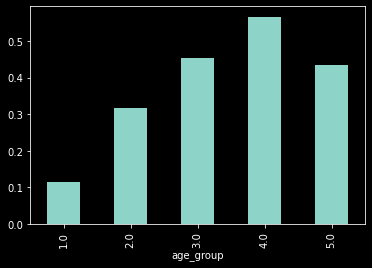

In [288]:
df_log_inc.groupby('age_group').pct_diff.mean().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

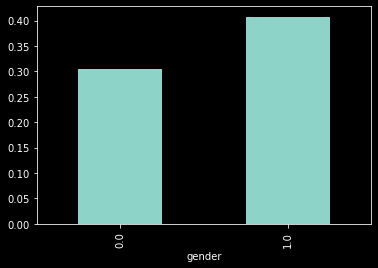

In [289]:
df_log_inc.groupby('gender').pct_diff.mean().plot(kind='bar')

<AxesSubplot:xlabel='edu_1'>

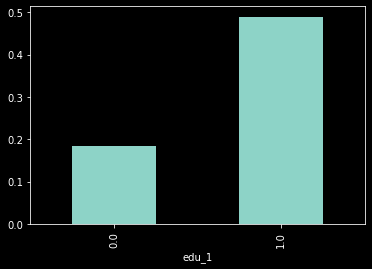

In [290]:
df_log_inc.groupby('edu_1').pct_diff.mean().plot(kind='bar')

<AxesSubplot:xlabel='edu_2'>

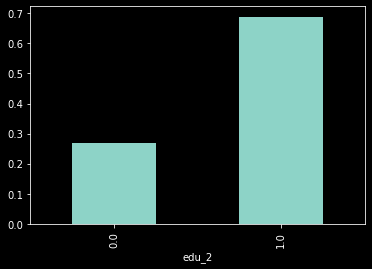

In [291]:
df_log_inc.groupby('edu_2').pct_diff.mean().plot(kind='bar')

<AxesSubplot:xlabel='marital_status'>

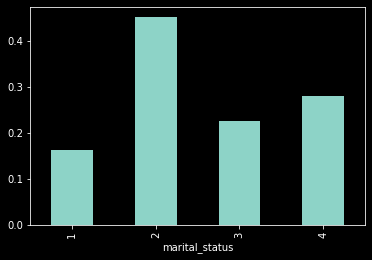

In [292]:
df_log_inc.groupby('marital_status').pct_diff.mean().plot(kind='bar')

<AxesSubplot:xlabel='urban'>

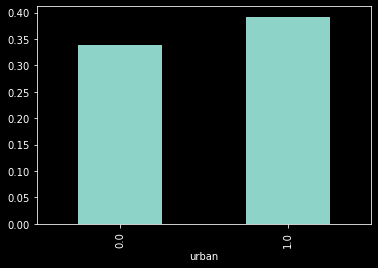

In [293]:
df_log_inc.groupby('urban').pct_diff.mean().plot(kind='bar')

<AxesSubplot:xlabel='sector'>

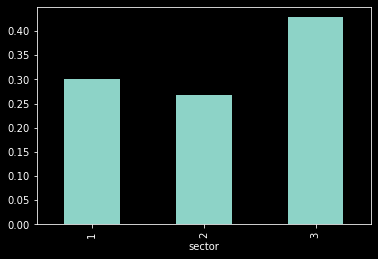

In [294]:
df_log_inc.groupby('sector').pct_diff.mean().plot(kind='bar')

<AxesSubplot:xlabel='industry'>

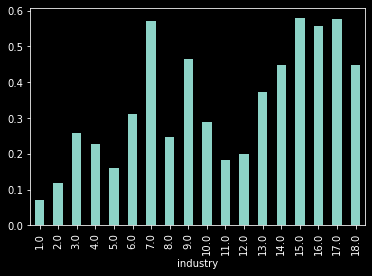

In [295]:
df_log_inc.groupby('industry').pct_diff.mean().plot(kind='bar')

<AxesSubplot:xlabel='ft_status'>

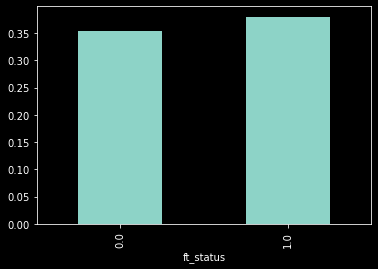

In [296]:
df_log_inc.groupby('ft_status').pct_diff.mean().plot(kind='bar')

<AxesSubplot:xlabel='moved'>

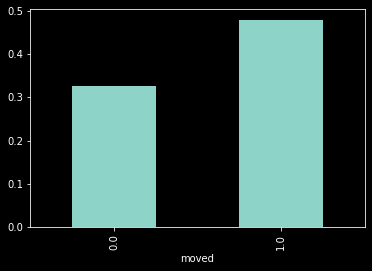

In [297]:
df_log_inc.groupby('moved').pct_diff.mean().plot(kind='bar')

#### Log Regression

In [464]:
#Transform the data set into a data frame
#X axis = We concatenate the Relationship, Education,Race,Occupation columns concate using np.c_ provided by the numpy library
df_x = pd.DataFrame(np.c_[df_log_inc['age_group'], df_log_inc['gender'], df_log_inc['yrs_school'],df_log_inc['marital_status'],df_log_inc['urban'],df_log_inc['industry'],df_log_inc['ft_status'],df_log_inc['moved']], columns = ['age_group','gender','yrs_school	','marital_status','urban','industry','ft_status','moved'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = pd.DataFrame(df_log_inc.pct_diff)

In [465]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [466]:
#Train our model with the training data
reg.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = reg.predict(x_test)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [467]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7546989666017673


#### Test Prediction

In [302]:
# feeding the predict function with our test values in the format 
# 'age_group','gender','edu_1','edu_2','marital_status','urban','sector','industry','ft_status','moved'
reg.predict([[1,1,1,1,2,1,3,1,1]])

array([1.])

In [303]:
# feeding the predict function with our test values in the format 
# 'age_group','gender','edu_1','edu_2','marital_status','urban','sector','industry','ft_status','moved'
reg.predict([[1,0,1,1,2,1,3,1,1]])

array([0.])

In [304]:
# feeding the predict function with our test values in the format 
# 'age_group','gender','edu_1','edu_2','marital_status','urban','sector','industry','ft_status','moved'
reg.predict([[3,1,1,0,1,0,1,1,1]])

array([1.])

In [305]:
# feeding the predict function with our test values in the format 
# 'age_group','gender','edu_1','edu_2','marital_status','urban','sector','industry','ft_status','moved'
reg.predict([[3,0,1,0,1,0,1,1,1]])

array([0.])

In [306]:
# feeding the predict function with our test values in the format 
# 'age_group','gender','edu_1','edu_2','marital_status','urban','sector','industry','ft_status','moved'
reg.predict([[2,0,1,1,2,1,3,1,1]])

array([1.])

### Random Forest & XG Boost

In [374]:
df_ols_inc

,age,work_hour,ft_status,yrs_school,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc
0,60,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,3900000.0,15.176487,0.0,0.0,1.0,1.389333,0.871014
1,46,42.0,1.0,16,1.0,1.0,0.0,2,1.0,0.0,3,18.0,2900000.0,14.880221,0.0,0.0,1.0,0.776683,0.574748
2,42,40.0,1.0,12,1.0,0.0,1.0,2,1.0,0.0,3,18.0,3000000.0,14.914123,0.0,0.0,1.0,0.837948,0.608650
3,34,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,1800000.0,14.403297,0.0,0.0,1.0,0.102769,0.097824
4,31,40.0,1.0,12,1.0,0.0,0.0,2,1.0,0.0,3,18.0,1200000.0,13.997832,0.0,0.0,1.0,-0.264821,-0.307641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,23,40.0,1.0,12,1.0,0.0,0.0,1,0.0,0.0,3,18.0,1000000.0,13.815511,0.0,0.0,1.0,-0.642031,-1.027310
163545,46,40.0,1.0,18,1.0,1.0,1.0,2,0.0,1.0,3,18.0,4800000.0,15.384126,0.0,0.0,1.0,0.718249,0.541306
163546,42,40.0,1.0,16,1.0,1.0,0.0,2,0.0,1.0,3,18.0,2500000.0,14.731801,0.0,0.0,1.0,-0.105079,-0.111020
163547,37,36.0,0.0,16,1.0,1.0,1.0,2,0.0,0.0,3,18.0,2000000.0,14.508658,0.0,0.0,1.0,-0.284063,-0.334163


#### Data Prep

In [375]:
df_rf_inc = df_ols_inc.copy()

In [376]:
df_rf_inc.loc[df_rf_inc['pct_diff_inc']>(-1),'pct_diff']=1
df_rf_inc.loc[df_rf_inc['pct_diff_inc']<0,'pct_diff']=0
df_rf_inc

,age,work_hour,ft_status,yrs_school,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc,pct_diff
0,60,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,3900000.0,15.176487,0.0,0.0,1.0,1.389333,0.871014,1.0
1,46,42.0,1.0,16,1.0,1.0,0.0,2,1.0,0.0,3,18.0,2900000.0,14.880221,0.0,0.0,1.0,0.776683,0.574748,1.0
2,42,40.0,1.0,12,1.0,0.0,1.0,2,1.0,0.0,3,18.0,3000000.0,14.914123,0.0,0.0,1.0,0.837948,0.608650,1.0
3,34,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,1800000.0,14.403297,0.0,0.0,1.0,0.102769,0.097824,1.0
4,31,40.0,1.0,12,1.0,0.0,0.0,2,1.0,0.0,3,18.0,1200000.0,13.997832,0.0,0.0,1.0,-0.264821,-0.307641,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,23,40.0,1.0,12,1.0,0.0,0.0,1,0.0,0.0,3,18.0,1000000.0,13.815511,0.0,0.0,1.0,-0.642031,-1.027310,0.0
163545,46,40.0,1.0,18,1.0,1.0,1.0,2,0.0,1.0,3,18.0,4800000.0,15.384126,0.0,0.0,1.0,0.718249,0.541306,1.0
163546,42,40.0,1.0,16,1.0,1.0,0.0,2,0.0,1.0,3,18.0,2500000.0,14.731801,0.0,0.0,1.0,-0.105079,-0.111020,0.0
163547,37,36.0,0.0,16,1.0,1.0,1.0,2,0.0,0.0,3,18.0,2000000.0,14.508658,0.0,0.0,1.0,-0.284063,-0.334163,0.0


In [377]:
df_rf_inc.loc[df_rf_inc['diff_log_inc']>(-1),'diff_log']=1
df_rf_inc.loc[df_rf_inc['diff_log_inc']<0,'diff_log']=0
df_rf_inc

,age,work_hour,ft_status,yrs_school,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc,pct_diff,diff_log
0,60,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,3900000.0,15.176487,0.0,0.0,1.0,1.389333,0.871014,1.0,1.0
1,46,42.0,1.0,16,1.0,1.0,0.0,2,1.0,0.0,3,18.0,2900000.0,14.880221,0.0,0.0,1.0,0.776683,0.574748,1.0,1.0
2,42,40.0,1.0,12,1.0,0.0,1.0,2,1.0,0.0,3,18.0,3000000.0,14.914123,0.0,0.0,1.0,0.837948,0.608650,1.0,1.0
3,34,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,1800000.0,14.403297,0.0,0.0,1.0,0.102769,0.097824,1.0,1.0
4,31,40.0,1.0,12,1.0,0.0,0.0,2,1.0,0.0,3,18.0,1200000.0,13.997832,0.0,0.0,1.0,-0.264821,-0.307641,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,23,40.0,1.0,12,1.0,0.0,0.0,1,0.0,0.0,3,18.0,1000000.0,13.815511,0.0,0.0,1.0,-0.642031,-1.027310,0.0,0.0
163545,46,40.0,1.0,18,1.0,1.0,1.0,2,0.0,1.0,3,18.0,4800000.0,15.384126,0.0,0.0,1.0,0.718249,0.541306,1.0,1.0
163546,42,40.0,1.0,16,1.0,1.0,0.0,2,0.0,1.0,3,18.0,2500000.0,14.731801,0.0,0.0,1.0,-0.105079,-0.111020,0.0,0.0
163547,37,36.0,0.0,16,1.0,1.0,1.0,2,0.0,0.0,3,18.0,2000000.0,14.508658,0.0,0.0,1.0,-0.284063,-0.334163,0.0,0.0


In [378]:
df_rf_inc.loc[(df_rf_inc['age']>17)&(df_rf_inc['age']<25),'age_group']=1
df_rf_inc.loc[(df_rf_inc['age']>24)&(df_rf_inc['age']<35),'age_group']=2
df_rf_inc.loc[(df_rf_inc['age']>34)&(df_rf_inc['age']<45),'age_group']=3
df_rf_inc.loc[(df_rf_inc['age']>44)&(df_rf_inc['age']<55),'age_group']=4
df_rf_inc.loc[(df_rf_inc['age']>54)&(df_rf_inc['age']<65),'age_group']=5
df_rf_inc

,age,work_hour,ft_status,yrs_school,edu_1,edu_2,gender,marital_status,urban,moved,sector,industry,nett_income,log_nett_income,primary,secondary,tertiary,pct_diff_inc,diff_log_inc,pct_diff,diff_log,age_group
0,60,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,3900000.0,15.176487,0.0,0.0,1.0,1.389333,0.871014,1.0,1.0,5.0
1,46,42.0,1.0,16,1.0,1.0,0.0,2,1.0,0.0,3,18.0,2900000.0,14.880221,0.0,0.0,1.0,0.776683,0.574748,1.0,1.0,4.0
2,42,40.0,1.0,12,1.0,0.0,1.0,2,1.0,0.0,3,18.0,3000000.0,14.914123,0.0,0.0,1.0,0.837948,0.608650,1.0,1.0,3.0
3,34,40.0,1.0,16,1.0,1.0,1.0,2,1.0,0.0,3,18.0,1800000.0,14.403297,0.0,0.0,1.0,0.102769,0.097824,1.0,1.0,2.0
4,31,40.0,1.0,12,1.0,0.0,0.0,2,1.0,0.0,3,18.0,1200000.0,13.997832,0.0,0.0,1.0,-0.264821,-0.307641,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163544,23,40.0,1.0,12,1.0,0.0,0.0,1,0.0,0.0,3,18.0,1000000.0,13.815511,0.0,0.0,1.0,-0.642031,-1.027310,0.0,0.0,1.0
163545,46,40.0,1.0,18,1.0,1.0,1.0,2,0.0,1.0,3,18.0,4800000.0,15.384126,0.0,0.0,1.0,0.718249,0.541306,1.0,1.0,4.0
163546,42,40.0,1.0,16,1.0,1.0,0.0,2,0.0,1.0,3,18.0,2500000.0,14.731801,0.0,0.0,1.0,-0.105079,-0.111020,0.0,0.0,3.0
163547,37,36.0,0.0,16,1.0,1.0,1.0,2,0.0,0.0,3,18.0,2000000.0,14.508658,0.0,0.0,1.0,-0.284063,-0.334163,0.0,0.0,3.0


In [379]:
print(df_rf_inc.isnull().sum())
print(df_rf_inc.dtypes)

age                0
work_hour          0
ft_status          0
yrs_school         0
edu_1              0
edu_2              0
gender             0
marital_status     0
urban              0
moved              0
sector             0
industry           0
nett_income        0
log_nett_income    0
primary            0
secondary          0
tertiary           0
pct_diff_inc       0
diff_log_inc       0
pct_diff           0
diff_log           0
age_group          0
dtype: int64
age                  int64
work_hour          float64
ft_status          float64
yrs_school           int64
edu_1              float64
edu_2              float64
gender             float64
marital_status       int64
urban              float64
moved              float64
sector               int64
industry           float64
nett_income        float64
log_nett_income    float64
primary            float64
secondary          float64
tertiary           float64
pct_diff_inc       float64
diff_log_inc       float64
pct_diff    

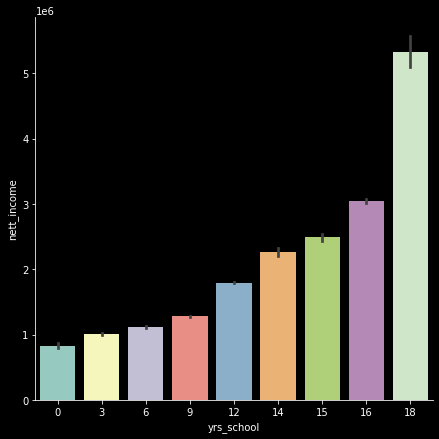

In [380]:
sns.catplot(x='yrs_school',y='nett_income',data=df_rf_inc,kind='bar',height=6)
plt.show()

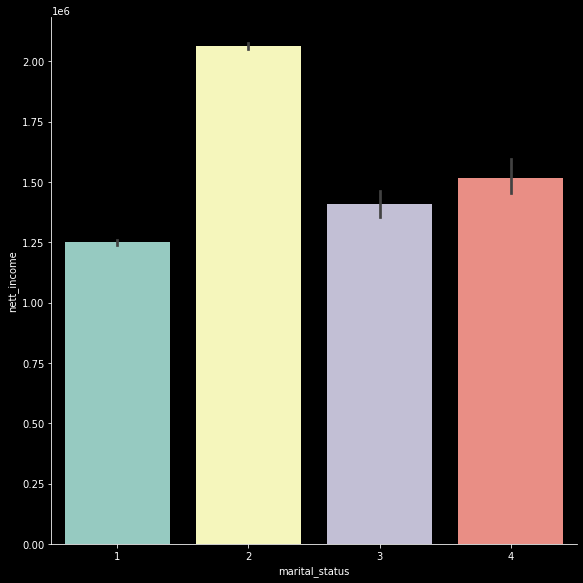

In [381]:
sns.catplot(x='marital_status',y='nett_income',data=df_rf_inc,kind='bar',height=8)
plt.show()

In [382]:
for column in df_rf_inc:
    enc=LabelEncoder()
    if df_rf_inc.dtypes[column]==np.object:
         df_rf_inc[column]=enc.fit_transform(df_rf_inc[column])

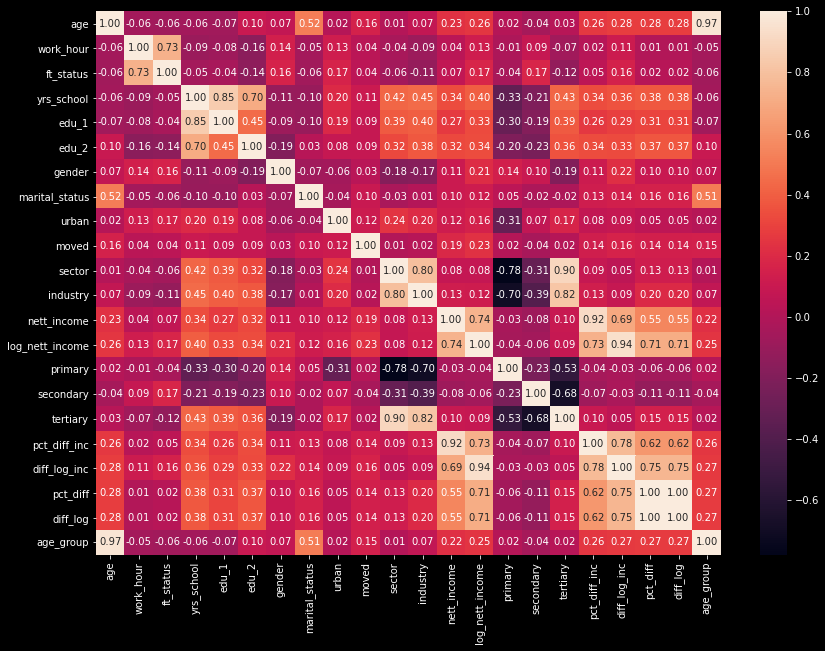

In [383]:
plt.figure(figsize=(14,10))
sns.heatmap(df_rf_inc.corr(),annot=True,fmt='.2f')
plt.show()

In [384]:
df_rf_inc_1=df_rf_inc.drop(['primary','secondary','tertiary','ft_status','yrs_school','industry','edu_2','nett_income','diff_log_inc','pct_diff_inc','diff_log','age_group','log_nett_income'],axis=1)

In [386]:
df_rf_inc_2=df_rf_inc.drop(['primary','secondary','tertiary','ft_status','yrs_school','industry','edu_1','nett_income','diff_log_inc','pct_diff_inc','diff_log','age_group','log_nett_income'],axis=1)

In [454]:
df_rf_inc_3=df_rf_inc.drop(['primary','secondary','tertiary','work_hour','edu_1','edu_2','sector','nett_income','diff_log_inc','pct_diff_inc','diff_log','age_group','log_nett_income'],axis=1)

In [456]:
df_rf_inc_4=df_rf_inc.drop(['primary','secondary','tertiary','work_hour','edu_1','edu_2','sector','pct_diff','diff_log_inc','pct_diff_inc','diff_log','age_group','log_nett_income'],axis=1)

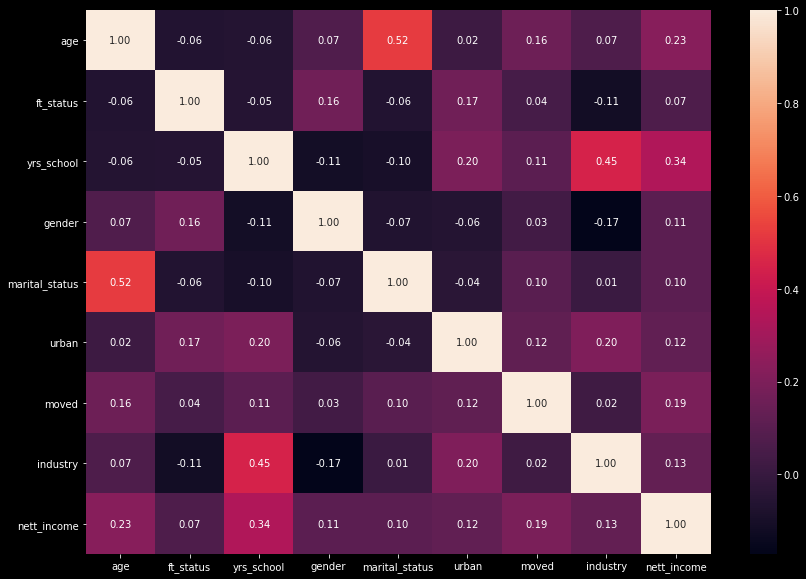

In [457]:
plt.figure(figsize=(14,10))
sns.heatmap(df_rf_inc_4.corr(),annot=True,fmt='.2f')
plt.show()

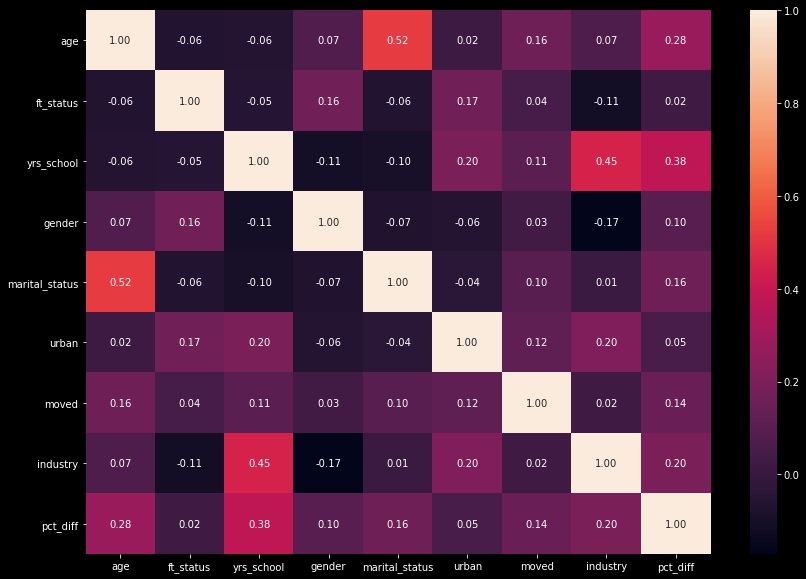

In [458]:
plt.figure(figsize=(14,10))
sns.heatmap(df_rf_inc_3.corr(),annot=True,fmt='.2f')
plt.show()

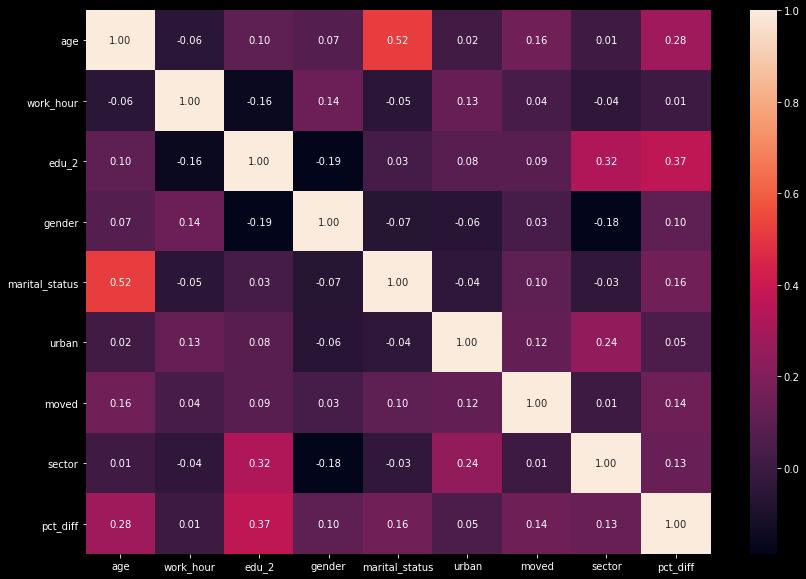

In [388]:
plt.figure(figsize=(14,10))
sns.heatmap(df_rf_inc_2.corr(),annot=True,fmt='.2f')
plt.show()

In [389]:
print(df_rf_inc_1.head())

   age  work_hour  edu_1  gender  marital_status  urban  moved  sector  pct_diff
0   60       40.0    1.0     1.0               2    1.0    0.0       3       1.0
1   46       42.0    1.0     0.0               2    1.0    0.0       3       1.0
2   42       40.0    1.0     1.0               2    1.0    0.0       3       1.0
3   34       40.0    1.0     1.0               2    1.0    0.0       3       1.0
4   31       40.0    1.0     0.0               2    1.0    0.0       3       0.0


In [391]:
X=df_rf_inc_1.iloc[:,0:-1]
y=df_rf_inc_1.iloc[:,-1]
print(X.head())
print(y.head())
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,shuffle=False)

   age  work_hour  edu_1  gender  marital_status  urban  moved  sector
0   60       40.0    1.0     1.0               2    1.0    0.0       3
1   46       42.0    1.0     0.0               2    1.0    0.0       3
2   42       40.0    1.0     1.0               2    1.0    0.0       3
3   34       40.0    1.0     1.0               2    1.0    0.0       3
4   31       40.0    1.0     0.0               2    1.0    0.0       3
0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: pct_diff, dtype: float64


In [392]:
clf=GaussianNB()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

73.30643766770977


In [393]:
clf=DecisionTreeClassifier()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

71.44110246423978


In [394]:
clf=RandomForestClassifier(n_estimators=100)
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

72.49515423938236


In [395]:
'''
---USED GRIDSEARCH FOR HYPERPARAMETER TUNING-----
'''
clf=RandomForestClassifier()
kf=KFold(n_splits=3)
max_features=np.array([1,2,3,4,5])
n_estimators=np.array([25,50,100,150,200])
min_samples_leaf=np.array([25,50,75,100])
param_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)
grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=kf)
gres=grid.fit(x_train,y_train)
print("Best",gres.best_score_)
print("params",gres.best_params_)

Best 0.757239321546793
params {'max_features': 2, 'min_samples_leaf': 75, 'n_estimators': 150}


In [396]:
clf=RandomForestClassifier(n_estimators=150,max_features=2,min_samples_leaf=75)
clf.fit(x_train,y_train)

RandomForestClassifier(max_features=2, min_samples_leaf=75, n_estimators=150)

In [397]:
pred=clf.predict(x_test)
pred

array([1., 0., 0., ..., 1., 1., 0.])

In [398]:
print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))


Accuracy: 74.994442 


In [399]:
dmat=xgb.DMatrix(x_train,y_train)
test_dmat=xgb.DMatrix(x_test)

In [390]:
print(df_rf_inc_2.head())

   age  work_hour  edu_2  gender  marital_status  urban  moved  sector  pct_diff
0   60       40.0    1.0     1.0               2    1.0    0.0       3       1.0
1   46       42.0    1.0     0.0               2    1.0    0.0       3       1.0
2   42       40.0    0.0     1.0               2    1.0    0.0       3       1.0
3   34       40.0    1.0     1.0               2    1.0    0.0       3       1.0
4   31       40.0    0.0     0.0               2    1.0    0.0       3       0.0


In [406]:
X=df_rf_inc_2.iloc[:,0:-1]
y=df_rf_inc_2.iloc[:,-1]
print(X.head())
print(y.head())
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,shuffle=False)

   age  work_hour  edu_2  gender  marital_status  urban  moved  sector
0   60       40.0    1.0     1.0               2    1.0    0.0       3
1   46       42.0    1.0     0.0               2    1.0    0.0       3
2   42       40.0    0.0     1.0               2    1.0    0.0       3
3   34       40.0    1.0     1.0               2    1.0    0.0       3
4   31       40.0    0.0     0.0               2    1.0    0.0       3
0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: pct_diff, dtype: float64


In [407]:
clf=GaussianNB()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

73.05822710066927


In [408]:
clf=DecisionTreeClassifier()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

71.94942513920127


In [409]:
clf=RandomForestClassifier(n_estimators=100)
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

72.77441393752075


## EXP_CAP

### OLS

In [277]:
df_ols_cap

,age,work_hour,ft_status,edu_1,edu_2,gender,sector,industry,moved,marital_status,urban,EXP_CAP,log_exp_cap,primary,secondary,tertiary,pct_diff_expcap,diff_log_expcap
0,41,35.0,0.0,1.0,0.0,1.0,2,8.0,0.0,2,1.0,3.434643e+05,12.746838,0.0,1.0,0.0,-0.405932,-0.520761
1,35,56.0,1.0,0.0,0.0,1.0,3,11.0,0.0,2,1.0,5.703095e+05,13.253935,0.0,0.0,1.0,-0.013572,-0.013665
2,60,40.0,1.0,1.0,1.0,1.0,3,18.0,0.0,2,1.0,1.305774e+06,14.082306,0.0,0.0,1.0,1.258513,0.814707
3,42,40.0,1.0,1.0,0.0,1.0,3,18.0,0.0,2,1.0,4.017619e+05,12.903615,0.0,0.0,1.0,-0.305098,-0.363985
4,34,40.0,1.0,1.0,1.0,1.0,3,18.0,0.0,2,1.0,7.000714e+05,13.458938,0.0,0.0,1.0,0.210868,0.191338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251348,36,40.0,1.0,1.0,0.0,1.0,3,18.0,1.0,2,0.0,1.648210e+06,14.315200,0.0,0.0,1.0,0.006442,0.006421
251349,46,40.0,1.0,1.0,1.0,1.0,3,18.0,1.0,2,0.0,1.959000e+06,14.487945,0.0,0.0,1.0,0.196219,0.179166
251350,40,70.0,1.0,1.0,0.0,1.0,3,18.0,1.0,2,0.0,2.233357e+06,14.619016,0.0,0.0,1.0,0.363749,0.310238
251351,50,48.0,1.0,1.0,0.0,1.0,1,1.0,1.0,2,0.0,7.117279e+05,13.475451,1.0,0.0,0.0,-0.565399,-0.833328


In [278]:
df_ols_cap.describe()

,age,work_hour,ft_status,edu_1,edu_2,gender,sector,industry,moved,marital_status,urban,EXP_CAP,log_exp_cap,primary,secondary,tertiary,pct_diff_expcap,diff_log_expcap
count,251353.000000,251353.000000,251353.000000,251353.000000,251353.000000,251353.000000,251353.000000,251353.000000,251353.000000,251353.000000,251353.000000,2.513530e+05,251353.000000,251353.000000,251353.000000,251353.000000,251353.000000,251353.000000
mean,43.906327,38.823400,1.214416,0.321353,0.084431,0.883849,1.779887,7.649565,0.266199,2.167601,0.432913,7.203392e+05,13.210960,0.427566,0.147291,0.352580,0.035531,-0.178050
std,10.479782,19.851049,2.216121,0.466997,0.278034,0.320407,1.010917,6.006727,0.441971,0.607655,0.495480,8.587425e+05,0.683173,0.494726,0.354396,0.477774,1.035266,0.603052
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.707492e+04,11.113565,0.000000,0.000000,0.000000,-0.908793,-2.394618
25%,36.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,3.297460e+05,12.706078,0.000000,0.000000,0.000000,-0.452145,-0.601745
50%,44.000000,42.000000,1.000000,0.000000,0.000000,1.000000,1.000000,8.000000,0.000000,2.000000,0.000000,5.093429e+05,13.140877,0.000000,0.000000,0.000000,-0.208556,-0.233897
75%,52.000000,49.000000,1.000000,1.000000,0.000000,1.000000,3.000000,11.000000,1.000000,2.000000,1.000000,8.329786e+05,13.632763,1.000000,0.000000,1.000000,0.203058,0.184866
max,64.000000,98.000000,9.000000,1.000000,1.000000,1.000000,3.000000,19.000000,1.000000,4.000000,1.000000,7.529981e+07,18.136988,1.000000,1.000000,1.000000,56.754681,4.056204


#### Individual, _pct_diff_expcap_

In [281]:
X = df_ols_cap[['age','gender','urban','edu_1','ft_status','work_hour','edu_2','secondary','tertiary']]
y = df_ols_cap['pct_diff_expcap']
X = sm.add_constant(X)

est_3 = sm.WLS(y,X)
reg_3 = est_2.fit()

reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           diff_log_inc   R-squared:                       0.310
Model:                            WLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     8161.
Date:                Fri, 25 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:19:38   Log-Likelihood:            -1.6276e+05
No. Observations:              163549   AIC:                         3.255e+05
Df Residuals:                  163539   BIC:                         3.256e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7215      0.009   -196.992      0.000      -1.739      -1.704
age            0.0189      0.000    123.311      0.000       0.019       0.019
gender         0.3805      0.004    106.562      0.000       0.374       0.388
ft_status      0.2379      0.005     44.593      0.000       0.227       0.248
urban          0.0331      0.004      9.175      0.000       0.026       0.040
edu_1          0.3733      0.004     93.989      0.000       0.365       0.381
work_hour      0.0025      0.000     16.229      0.000       0.002       0.003
edu_2          0.5497      0.004    123.805      0.000       0.541       0.558
secondary     -0.0587      0.006    -10.665      0.000      -0.070      -0.048
tertiary      -0.1829      0.005    -35.841      0.000      -0.193      -0.173
==============================================================================
Omnibus:                    12539.389   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25226.235
Skew:                          -0.525   Prob(JB):                         0.00
Kurtosis:                       4.612   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Individual, _diff_log_expcap_

In [282]:
X = df_ols_cap[['age','gender','urban','edu_1','ft_status','work_hour','edu_2','secondary','tertiary']]
y = df_ols_cap['diff_log_expcap']
X = sm.add_constant(X)

est_3 = sm.WLS(y,X)
reg_3 = est_2.fit()

reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           diff_log_inc   R-squared:                       0.310
Model:                            WLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     8161.
Date:                Fri, 25 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:19:51   Log-Likelihood:            -1.6276e+05
No. Observations:              163549   AIC:                         3.255e+05
Df Residuals:                  163539   BIC:                         3.256e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7215      0.009   -196.992      0.000      -1.739      -1.704
age            0.0189      0.000    123.311      0.000       0.019       0.019
gender         0.3805      0.004    106.562      0.000       0.374       0.388
ft_status      0.2379      0.005     44.593      0.000       0.227       0.248
urban          0.0331      0.004      9.175      0.000       0.026       0.040
edu_1          0.3733      0.004     93.989      0.000       0.365       0.381
work_hour      0.0025      0.000     16.229      0.000       0.002       0.003
edu_2          0.5497      0.004    123.805      0.000       0.541       0.558
secondary     -0.0587      0.006    -10.665      0.000      -0.070      -0.048
tertiary      -0.1829      0.005    -35.841      0.000      -0.193      -0.173
==============================================================================
Omnibus:                    12539.389   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25226.235
Skew:                          -0.525   Prob(JB):                         0.00
Kurtosis:                       4.612   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Logistic Regression

#### Data Prep

In [307]:
df_ols_cap

,age,work_hour,ft_status,edu_1,edu_2,gender,sector,industry,moved,marital_status,urban,EXP_CAP,log_exp_cap,primary,secondary,tertiary,pct_diff_expcap,diff_log_expcap
0,41,35.0,0.0,1.0,0.0,1.0,2,8.0,0.0,2,1.0,3.434643e+05,12.746838,0.0,1.0,0.0,-0.405932,-0.520761
1,35,56.0,1.0,0.0,0.0,1.0,3,11.0,0.0,2,1.0,5.703095e+05,13.253935,0.0,0.0,1.0,-0.013572,-0.013665
2,60,40.0,1.0,1.0,1.0,1.0,3,18.0,0.0,2,1.0,1.305774e+06,14.082306,0.0,0.0,1.0,1.258513,0.814707
3,42,40.0,1.0,1.0,0.0,1.0,3,18.0,0.0,2,1.0,4.017619e+05,12.903615,0.0,0.0,1.0,-0.305098,-0.363985
4,34,40.0,1.0,1.0,1.0,1.0,3,18.0,0.0,2,1.0,7.000714e+05,13.458938,0.0,0.0,1.0,0.210868,0.191338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251348,36,40.0,1.0,1.0,0.0,1.0,3,18.0,1.0,2,0.0,1.648210e+06,14.315200,0.0,0.0,1.0,0.006442,0.006421
251349,46,40.0,1.0,1.0,1.0,1.0,3,18.0,1.0,2,0.0,1.959000e+06,14.487945,0.0,0.0,1.0,0.196219,0.179166
251350,40,70.0,1.0,1.0,0.0,1.0,3,18.0,1.0,2,0.0,2.233357e+06,14.619016,0.0,0.0,1.0,0.363749,0.310238
251351,50,48.0,1.0,1.0,0.0,1.0,1,1.0,1.0,2,0.0,7.117279e+05,13.475451,1.0,0.0,0.0,-0.565399,-0.833328


In [308]:
df_log_cap = df_ols_cap.copy()

In [309]:
df_log_cap.loc[df_log_cap['pct_diff_expcap']>(-1),'pct_diff']=1
df_log_cap.loc[df_log_cap['pct_diff_expcap']<0,'pct_diff']=0
df_log_cap

,age,work_hour,ft_status,edu_1,edu_2,gender,sector,industry,moved,marital_status,urban,EXP_CAP,log_exp_cap,primary,secondary,tertiary,pct_diff_expcap,diff_log_expcap,pct_diff
0,41,35.0,0.0,1.0,0.0,1.0,2,8.0,0.0,2,1.0,3.434643e+05,12.746838,0.0,1.0,0.0,-0.405932,-0.520761,0.0
1,35,56.0,1.0,0.0,0.0,1.0,3,11.0,0.0,2,1.0,5.703095e+05,13.253935,0.0,0.0,1.0,-0.013572,-0.013665,0.0
2,60,40.0,1.0,1.0,1.0,1.0,3,18.0,0.0,2,1.0,1.305774e+06,14.082306,0.0,0.0,1.0,1.258513,0.814707,1.0
3,42,40.0,1.0,1.0,0.0,1.0,3,18.0,0.0,2,1.0,4.017619e+05,12.903615,0.0,0.0,1.0,-0.305098,-0.363985,0.0
4,34,40.0,1.0,1.0,1.0,1.0,3,18.0,0.0,2,1.0,7.000714e+05,13.458938,0.0,0.0,1.0,0.210868,0.191338,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251348,36,40.0,1.0,1.0,0.0,1.0,3,18.0,1.0,2,0.0,1.648210e+06,14.315200,0.0,0.0,1.0,0.006442,0.006421,1.0
251349,46,40.0,1.0,1.0,1.0,1.0,3,18.0,1.0,2,0.0,1.959000e+06,14.487945,0.0,0.0,1.0,0.196219,0.179166,1.0
251350,40,70.0,1.0,1.0,0.0,1.0,3,18.0,1.0,2,0.0,2.233357e+06,14.619016,0.0,0.0,1.0,0.363749,0.310238,1.0
251351,50,48.0,1.0,1.0,0.0,1.0,1,1.0,1.0,2,0.0,7.117279e+05,13.475451,1.0,0.0,0.0,-0.565399,-0.833328,0.0


In [310]:
df_log_cap.loc[df_log_cap['diff_log_expcap']>(-1),'diff_log']=1
df_log_cap.loc[df_log_cap['diff_log_expcap']<0,'diff_log']=0
df_log_cap

,age,work_hour,ft_status,edu_1,edu_2,gender,sector,industry,moved,marital_status,urban,EXP_CAP,log_exp_cap,primary,secondary,tertiary,pct_diff_expcap,diff_log_expcap,pct_diff,diff_log
0,41,35.0,0.0,1.0,0.0,1.0,2,8.0,0.0,2,1.0,3.434643e+05,12.746838,0.0,1.0,0.0,-0.405932,-0.520761,0.0,0.0
1,35,56.0,1.0,0.0,0.0,1.0,3,11.0,0.0,2,1.0,5.703095e+05,13.253935,0.0,0.0,1.0,-0.013572,-0.013665,0.0,0.0
2,60,40.0,1.0,1.0,1.0,1.0,3,18.0,0.0,2,1.0,1.305774e+06,14.082306,0.0,0.0,1.0,1.258513,0.814707,1.0,1.0
3,42,40.0,1.0,1.0,0.0,1.0,3,18.0,0.0,2,1.0,4.017619e+05,12.903615,0.0,0.0,1.0,-0.305098,-0.363985,0.0,0.0
4,34,40.0,1.0,1.0,1.0,1.0,3,18.0,0.0,2,1.0,7.000714e+05,13.458938,0.0,0.0,1.0,0.210868,0.191338,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251348,36,40.0,1.0,1.0,0.0,1.0,3,18.0,1.0,2,0.0,1.648210e+06,14.315200,0.0,0.0,1.0,0.006442,0.006421,1.0,1.0
251349,46,40.0,1.0,1.0,1.0,1.0,3,18.0,1.0,2,0.0,1.959000e+06,14.487945,0.0,0.0,1.0,0.196219,0.179166,1.0,1.0
251350,40,70.0,1.0,1.0,0.0,1.0,3,18.0,1.0,2,0.0,2.233357e+06,14.619016,0.0,0.0,1.0,0.363749,0.310238,1.0,1.0
251351,50,48.0,1.0,1.0,0.0,1.0,1,1.0,1.0,2,0.0,7.117279e+05,13.475451,1.0,0.0,0.0,-0.565399,-0.833328,0.0,0.0


In [311]:
df_log_cap.loc[(df_log_cap['age']>17)&(df_log_cap['age']<25),'age_group']=1
df_log_cap.loc[(df_log_cap['age']>24)&(df_log_cap['age']<35),'age_group']=2
df_log_cap.loc[(df_log_cap['age']>34)&(df_log_cap['age']<45),'age_group']=3
df_log_cap.loc[(df_log_cap['age']>44)&(df_log_cap['age']<55),'age_group']=4
df_log_cap.loc[(df_log_cap['age']>54)&(df_log_cap['age']<65),'age_group']=5
df_log_cap

,age,work_hour,ft_status,edu_1,edu_2,gender,sector,industry,moved,marital_status,urban,EXP_CAP,log_exp_cap,primary,secondary,tertiary,pct_diff_expcap,diff_log_expcap,pct_diff,diff_log,age_group
0,41,35.0,0.0,1.0,0.0,1.0,2,8.0,0.0,2,1.0,3.434643e+05,12.746838,0.0,1.0,0.0,-0.405932,-0.520761,0.0,0.0,3.0
1,35,56.0,1.0,0.0,0.0,1.0,3,11.0,0.0,2,1.0,5.703095e+05,13.253935,0.0,0.0,1.0,-0.013572,-0.013665,0.0,0.0,3.0
2,60,40.0,1.0,1.0,1.0,1.0,3,18.0,0.0,2,1.0,1.305774e+06,14.082306,0.0,0.0,1.0,1.258513,0.814707,1.0,1.0,5.0
3,42,40.0,1.0,1.0,0.0,1.0,3,18.0,0.0,2,1.0,4.017619e+05,12.903615,0.0,0.0,1.0,-0.305098,-0.363985,0.0,0.0,3.0
4,34,40.0,1.0,1.0,1.0,1.0,3,18.0,0.0,2,1.0,7.000714e+05,13.458938,0.0,0.0,1.0,0.210868,0.191338,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251348,36,40.0,1.0,1.0,0.0,1.0,3,18.0,1.0,2,0.0,1.648210e+06,14.315200,0.0,0.0,1.0,0.006442,0.006421,1.0,1.0,3.0
251349,46,40.0,1.0,1.0,1.0,1.0,3,18.0,1.0,2,0.0,1.959000e+06,14.487945,0.0,0.0,1.0,0.196219,0.179166,1.0,1.0,4.0
251350,40,70.0,1.0,1.0,0.0,1.0,3,18.0,1.0,2,0.0,2.233357e+06,14.619016,0.0,0.0,1.0,0.363749,0.310238,1.0,1.0,3.0
251351,50,48.0,1.0,1.0,0.0,1.0,1,1.0,1.0,2,0.0,7.117279e+05,13.475451,1.0,0.0,0.0,-0.565399,-0.833328,0.0,0.0,4.0


In [312]:
df_log_cap = df_log_cap[['age_group',
               'age',
               'gender',
               'edu_1',
               'edu_2',
               'marital_status',
               'urban',
               'sector',
               'industry',
               'ft_status',
               'moved',
               'pct_diff',
               'diff_log']]
df_log_cap = df_log_cap[df_log_cap['sector']!=0]
df_log_cap

,age_group,age,gender,edu_1,edu_2,marital_status,urban,sector,industry,ft_status,moved,pct_diff,diff_log
0,3.0,41,1.0,1.0,0.0,2,1.0,2,8.0,0.0,0.0,0.0,0.0
1,3.0,35,1.0,0.0,0.0,2,1.0,3,11.0,1.0,0.0,0.0,0.0
2,5.0,60,1.0,1.0,1.0,2,1.0,3,18.0,1.0,0.0,1.0,1.0
3,3.0,42,1.0,1.0,0.0,2,1.0,3,18.0,1.0,0.0,0.0,0.0
4,2.0,34,1.0,1.0,1.0,2,1.0,3,18.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251348,3.0,36,1.0,1.0,0.0,2,0.0,3,18.0,1.0,1.0,1.0,1.0
251349,4.0,46,1.0,1.0,1.0,2,0.0,3,18.0,1.0,1.0,1.0,1.0
251350,3.0,40,1.0,1.0,0.0,2,0.0,3,18.0,1.0,1.0,1.0,1.0
251351,4.0,50,1.0,1.0,0.0,2,0.0,1,1.0,1.0,1.0,0.0,0.0


#### Log Regression

In [314]:
#Transform the data set into a data frame
#X axis = We concatenate the Relationship, Education,Race,Occupation columns concate using np.c_ provided by the numpy library
df_x = pd.DataFrame(np.c_[df_log_cap['age_group'], df_log_cap['gender'], df_log_cap['edu_1'],df_log_cap['edu_2'],df_log_cap['marital_status'],df_log_cap['urban'],df_log_cap['sector'],df_log_cap['ft_status'],df_log_cap['moved']], columns = ['age_group','gender','edu_1','edu_2','marital_status','urban','sector','ft_status','moved'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = pd.DataFrame(df_log_cap.pct_diff)

In [315]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [316]:
#Train our model with the training data
reg.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = reg.predict(x_test)

C:\Users\Ryzen\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [317]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6993682404326124


#### Test Prediction

In [318]:
# feeding the predict function with our test values in the format 
# 'age_group','gender','edu_1','edu_2','marital_status','urban','sector','industry','ft_status','moved'
reg.predict([[1,1,1,1,2,1,3,1,1]])

array([1.])

In [319]:
# feeding the predict function with our test values in the format 
# 'age_group','gender','edu_1','edu_2','marital_status','urban','sector','industry','ft_status','moved'
reg.predict([[1,0,1,1,2,1,3,1,1]])

array([1.])

In [320]:
# feeding the predict function with our test values in the format 
# 'age_group','gender','edu_1','edu_2','marital_status','urban','sector','industry','ft_status','moved'
reg.predict([[3,1,1,0,1,0,1,1,1]])

array([0.])

In [321]:
# feeding the predict function with our test values in the format 
# 'age_group','gender','edu_1','edu_2','marital_status','urban','sector','industry','ft_status','moved'
reg.predict([[3,0,1,0,1,0,1,1,1]])

array([1.])

In [322]:
# feeding the predict function with our test values in the format 
# 'age_group','gender','edu_1','edu_2','marital_status','urban','sector','industry','ft_status','moved'
reg.predict([[2,0,1,1,2,1,3,1,1]])

array([1.])